In [6]:
'''Project for data analysis on Bank Customer Churn
Problem want to be investigated:
Q1: Any insight discovered?
Q2: What suggestion can be made to prevent from customer churn?
Q3: Model development to predict the customer churn
'''

import numpy as np
import pandas as pd
import scipy as sp
import numpy.random as random
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn

%matplotlib inline
%precision 3

'%.3f'

In [7]:
import requests, zipfile
import io

In [12]:
# data extraction from the datasets from Kaggle

cs_data = pd.read_csv('Customer-Churn-Records.csv')
df = DataFrame(cs_data)

# confirmation of successful extraction
df.head()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

In [13]:
# data transform with preprocessing

# the shape of dataset
print('The Shape of Customer Churn: {}.'.format(df.shape))

The Shape of Customer Churn: (10000, 18).


In [14]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [15]:
# no need for data type conversion 
# no need for text replacement

# check missing values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [21]:
# no missing data
# check any duplicated data
print('The Duplicates Count in Data: {}.'.format(df.duplicated().sum()))

The Duplicates Count in Data: 0.


In [23]:
# study the basic information for sample distribution first
df.groupby(['Gender']).size()

Gender
Female    4543
Male      5457
dtype: int64

In [44]:
# no duplicated data

# function of graph plotting
def plot_pie_bar(dataset, title):
    # subplot for pie chart
    plt.subplot(2, 1, 1)
    dataset.plot(kind='pie', startangle=90, autopct='%1.1f%%', figsize=(10, 10))
    plt.title('Customer Distribution of {}'.format(title))
    plt.legend(loc = 'best')
    
    # subplot for bar chart
    plt.subplot(2, 1, 2)
    dataset.plot(kind='bar', align='center')
    plt.title('Customer Distribution of {}'.format(title))
    plt.ylabel('Customer')
    plt.grid(True)
    plt.tight_layout()

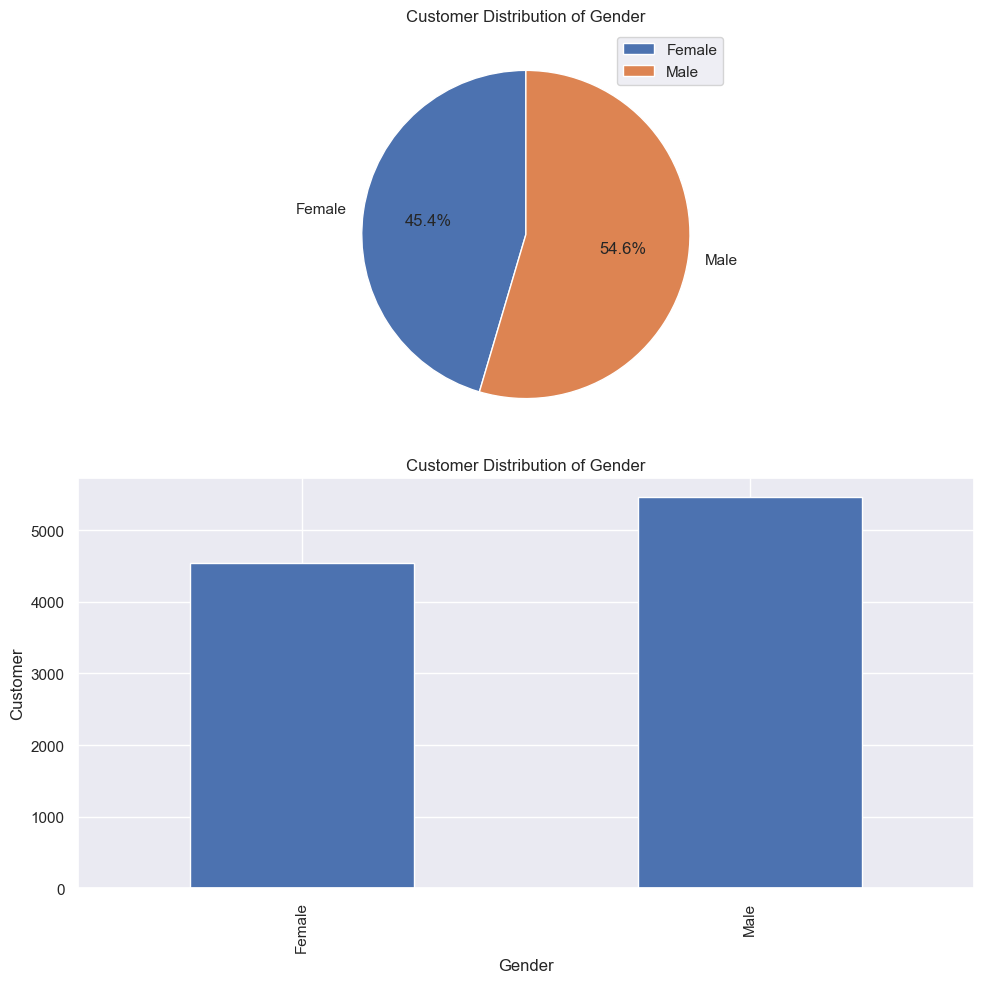

In [45]:
# Customer Distribution of Gender
plot_pie_bar(df.groupby(['Gender']).size(), 'Gender')

In [ ]:
'''Observation 1
The data quantity for male customers is higher, accounting for 54.6% (5457 out of 10000). 
Although equal quantity of dataset can be more fair in analysis with gender,
I think it is not suitable to delete several data from male customers in order to balance the data quantity.
Retaining more data for analysis in other factors like 'Satisfaction Score' is more meaningful to discuss the reason of customer churn.
'''

In [46]:
# Customer Distribution of Credit Score
# For better understanding, it is suggested to implement data binning to consider credit score
# Let's apply the FICO 8 model for evaluation of model score

fico_model = [300, 580, 670, 740, 800, 851]
fico_rating = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
df_credit_score = pd.cut(df.CreditScore, fico_model, labels=fico_rating)
df_credit_score

0              Fair
1              Fair
2         Very Poor
3              Good
4       Exceptional
           ...     
9995      Very Good
9996      Very Poor
9997           Good
9998      Very Good
9999      Very Good
Name: CreditScore, Length: 10000, dtype: category
Categories (5, object): ['Very Poor' < 'Fair' < 'Good' < 'Very Good' < 'Exceptional']

In [47]:
# count the credit score in numerical format 
pd.value_counts(df_credit_score)

CreditScore
Fair           3350
Good           2397
Very Poor      2393
Very Good      1215
Exceptional     645
Name: count, dtype: int64

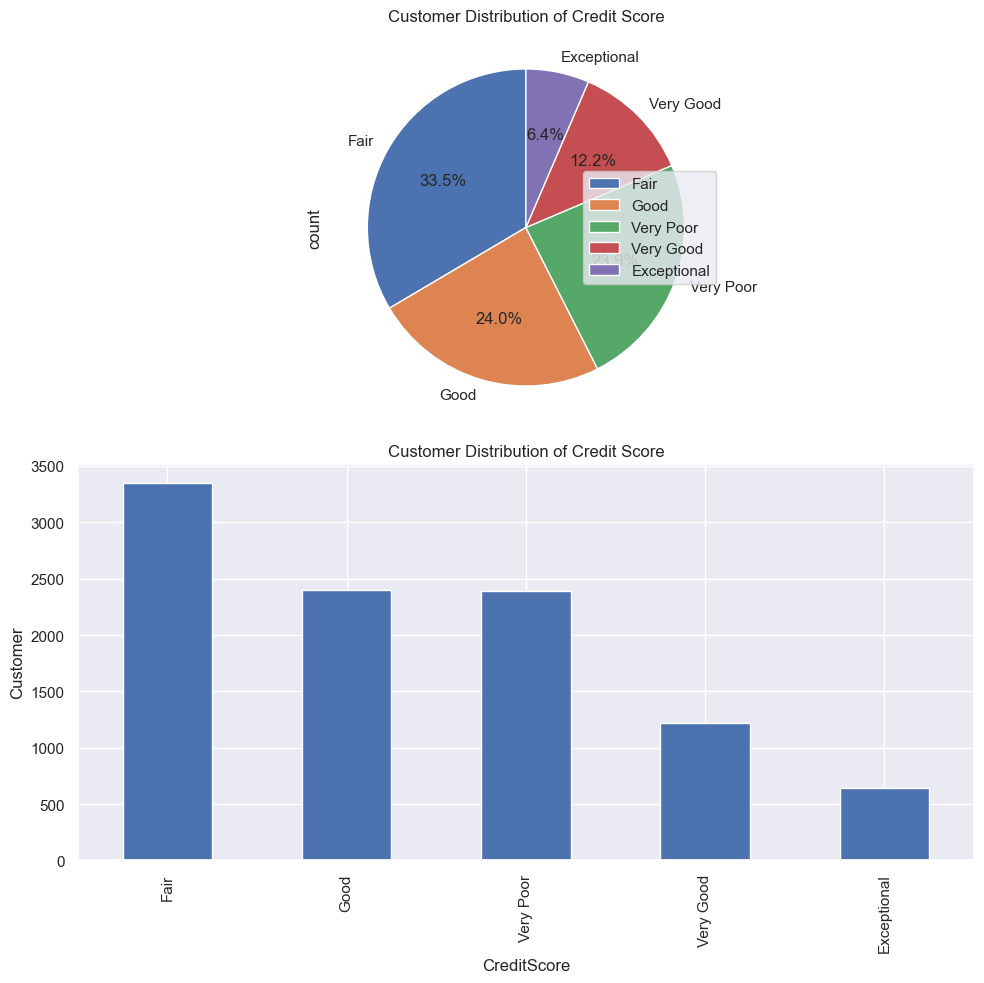

In [48]:
# distribution of credit score
plot_pie_bar(pd.value_counts(df_credit_score), 'Credit Score')

In [ ]:
'''Observation 2
The majority of customers' credit score are fair (33.5%) (2393 out of 10000).
Then, 'Good' and 'Very Poor' have similar percentage of roughly 24%.
Generally, the data can show prevalent cases of credit score without extremely large quantity of 'Very Good' or above customer scores.
The sample is more likely to reflect the similar distribution as compared in reality.

'''

In [85]:
# Customer Distribution of Age Group
# Let's perform data binning for easier review

age_bin = [0, 18, 30, 65, 100]
age_group = ['Child', 'Young_Adult', 'Adult', 'Elderly']
df_age = pd.cut(df.Age, age_bin, labels=age_group)
df_age

0             Adult
1             Adult
2             Adult
3             Adult
4             Adult
           ...     
9995          Adult
9996          Adult
9997          Adult
9998          Adult
9999    Young_Adult
Name: Age, Length: 10000, dtype: category
Categories (4, object): ['Child' < 'Young_Adult' < 'Adult' < 'Elderly']

In [86]:
# count the age in numerical format 
pd.value_counts(df_age)

Age
Adult          7768
Young_Adult    1946
Elderly         264
Child            22
Name: count, dtype: int64

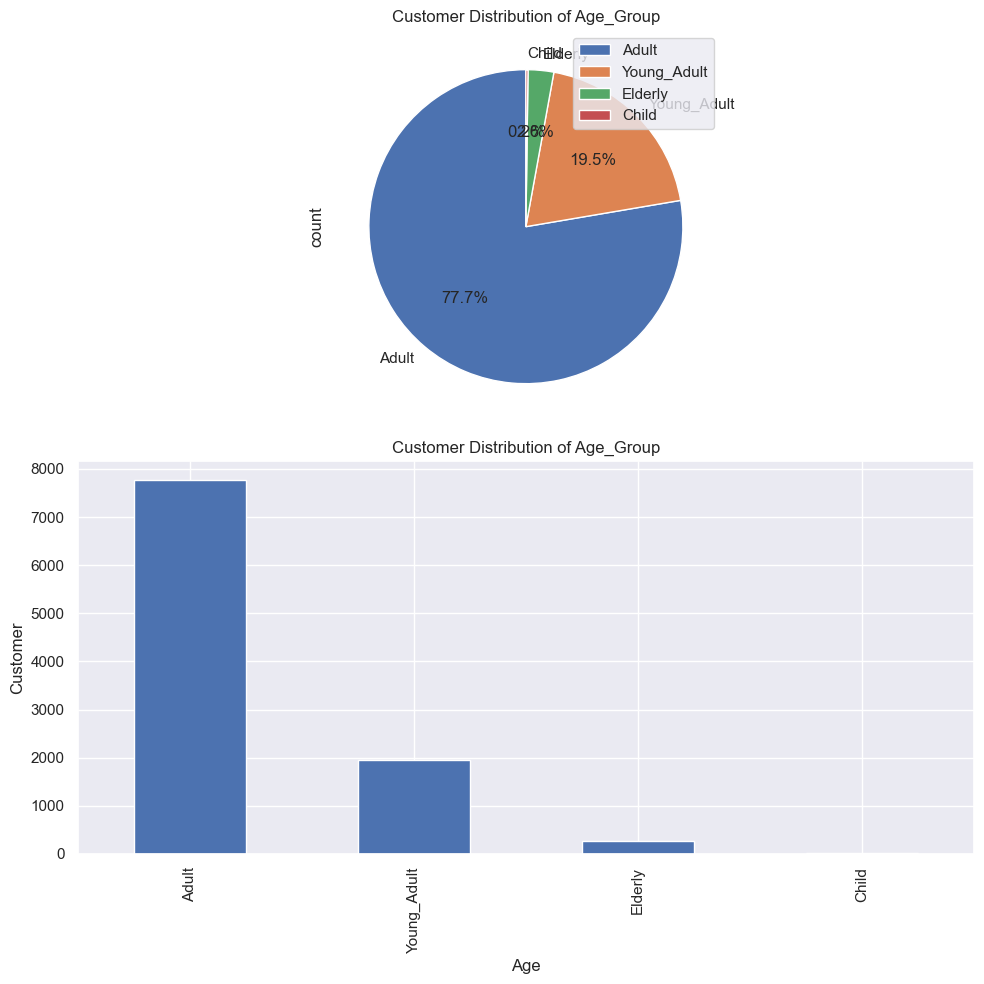

In [87]:
# plot graph for age group distribution
plot_pie_bar(pd.value_counts(df_age), 'Age_Group')

In [ ]:
'''Observation 3
Majority of the customers is Adult group (77.7%) (7768 out of 10000).
The lowest quantity of customers is in Child group (0.22%) (22 out of 10000).
In my points of view, the data is quite suitable in distribution for further data analysis,
because adult group is the largest group in a city/country and more probably to generate high work productivity in society.
The convergence of adult data can be useful for investigating root causes of customer churn.
Besides, the young adult group can also reduce the data centralization in adult only. 
Looking forward to discover anything interesting in further analysis.
'''

In [88]:
# Customer Distribution of Tenure 
df.groupby(['Tenure']).size()

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
dtype: int64

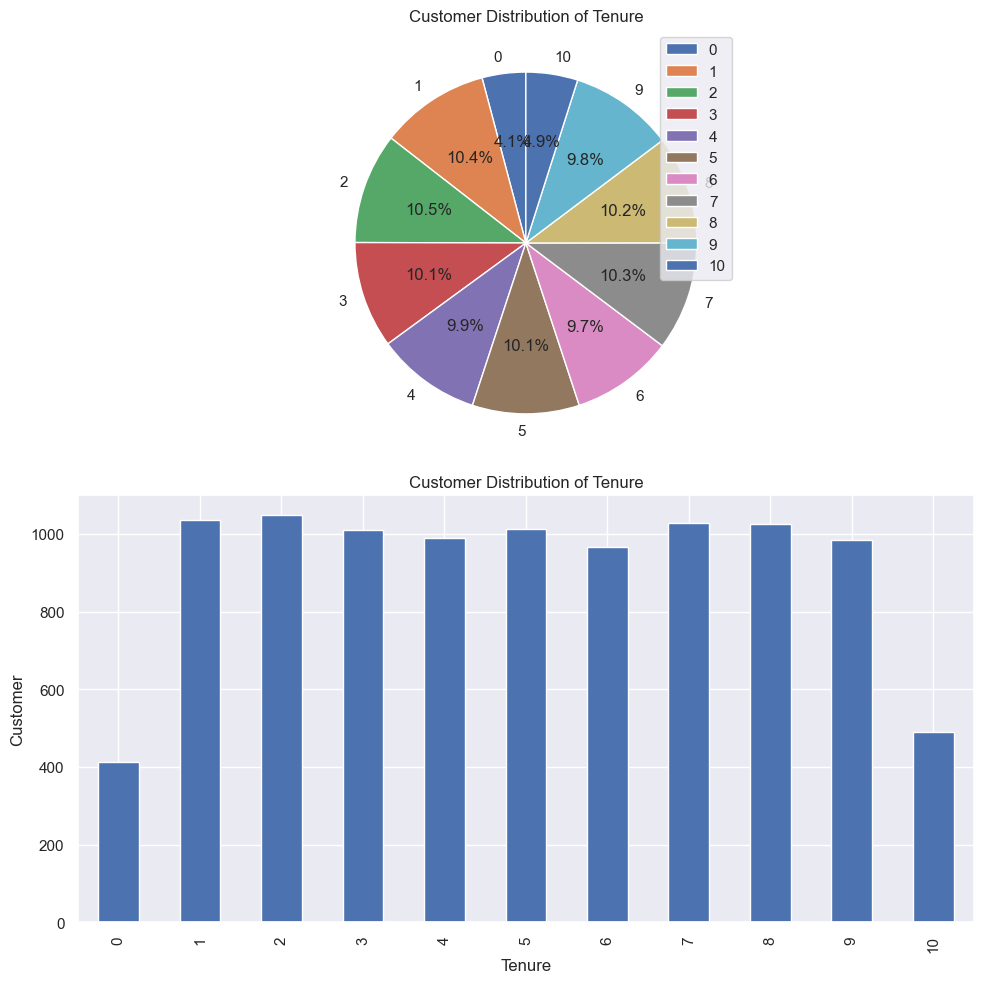

In [89]:
plot_pie_bar(df.groupby(['Tenure']).size(), 'Tenure')

In [ ]:
'''Observation 4
The tenure data is evenly distributed (each around 10%) as shwon in above pie graph.
It is fair to include variety of customers' tenure data in evenly dsitributed format,
reducing bias which may lead to inaccurate result for analysis.
'''

In [90]:
# Customer Distribution of Balance
df.groupby(['Balance']).size()

Balance
0.00         3617
3768.69         1
12459.19        1
14262.80        1
16893.59        1
             ... 
216109.88       1
221532.80       1
222267.63       1
238387.56       1
250898.09       1
Length: 6382, dtype: int64

In [91]:
# better to perform data binning

pd.value_counts(pd.cut(df.Balance, 5))

Balance
(100359.236, 150538.854]    3828
(-250.898, 50179.618]       3692
(50179.618, 100359.236]     1533
(150538.854, 200718.472]     915
(200718.472, 250898.09]       32
Name: count, dtype: int64

In [192]:
# take the approximate boundary for binning
balance_dis = pd.value_counts(pd.cut(df.Balance, 5, labels=['Below 50,000', '50,000 - 100,000', '100,000 - 150,000', '150,000 - 200,000', '200,000 - 250,000']))
balance_dis

Balance
100,000 - 150,000    3828
Below 50,000         3692
50,000 - 100,000     1533
150,000 - 200,000     915
200,000 - 250,000      32
Name: count, dtype: int64

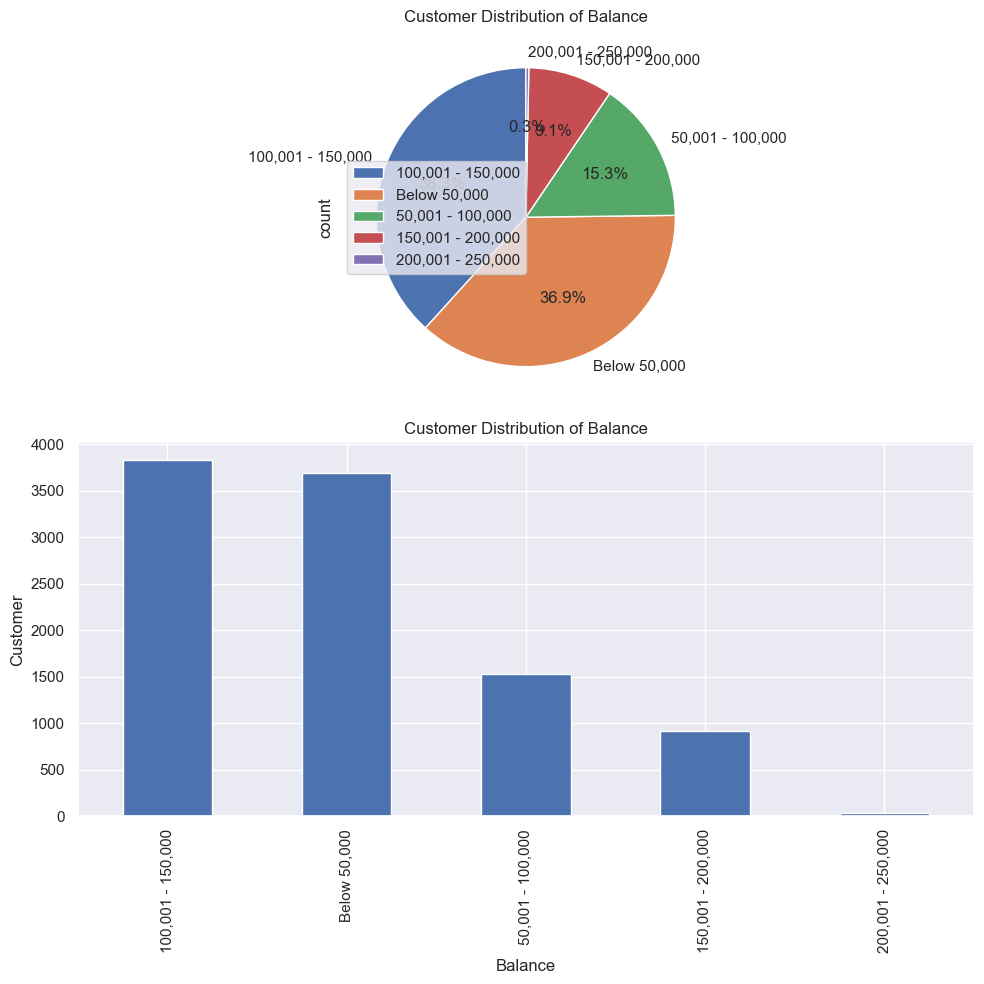

In [93]:
# Customer Distribution of Balance
plot_pie_bar(balance_dis, 'Balance')

In [ ]:
'''Observation 5
The highest percentage balance group belong to the customer group with balance $100,001 to $150,000 (38.3%).
The 2nd top percentage belong to the group with balance under $50,000.
The lowest percentage belong to the group with balance above $200,001.
In my opinion, the data is very useful to study the customer churn under common balance values like $150,000.
However, the extremely low percentage for balance above $200,001 may not easily help us to study the relationship between balance and exit.
It may be one of the limitation of using this datasets.
'''

In [94]:
# Customer Distribution of Salary
df_salary = pd.value_counts(pd.cut(df.EstimatedSalary, 5))
df_salary

EstimatedSalary
(40007.76, 80003.94]     2033
(80003.94, 120000.12]    2029
(159996.3, 199992.48]    1994
(120000.12, 159996.3]    1989
(-188.401, 40007.76]     1955
Name: count, dtype: int64

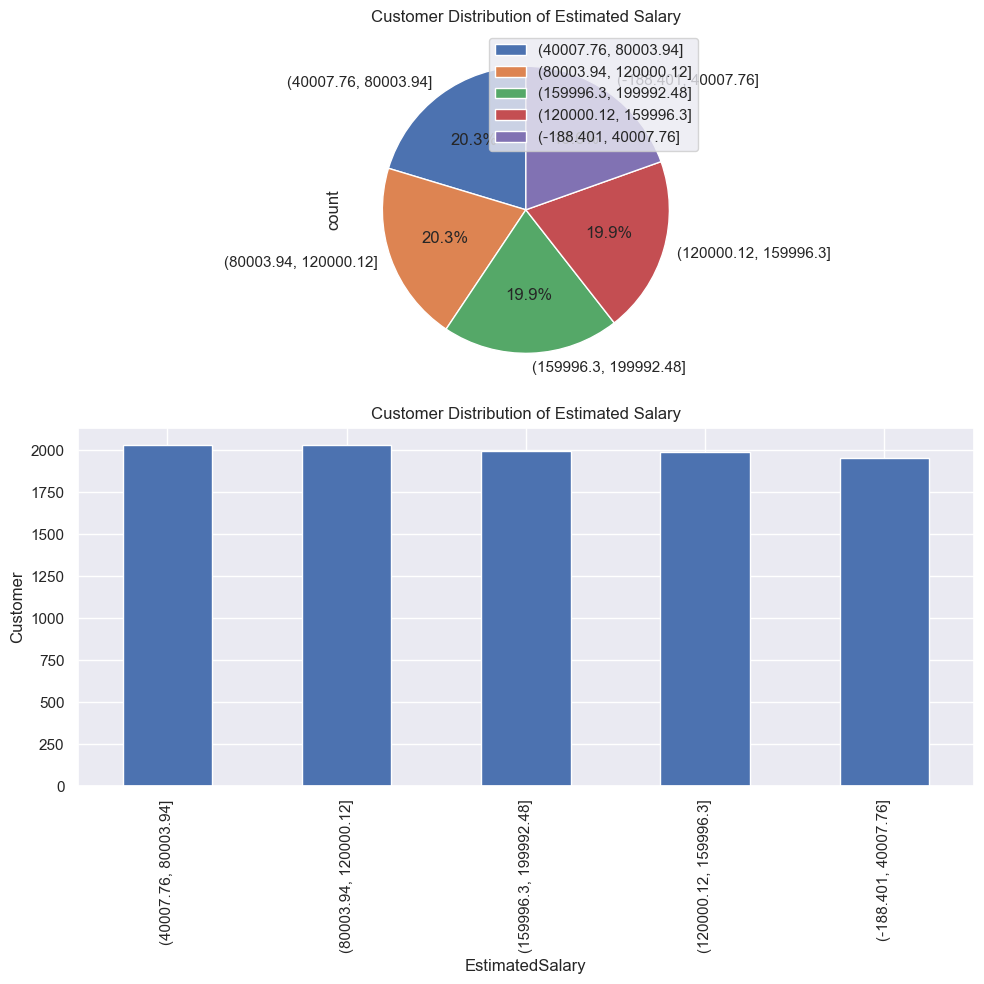

In [95]:
plot_pie_bar(df_salary, 'Estimated Salary')

In [ ]:
'''Observation 6
After data binning, the salary groups data are evenly distributed.
Comparing to the balance chart, 
Finding 1: there are around 9.5% of customers' balance with 150,001 or above.

Finding 2: there are approximately %19.9 of customers' estimated salary with $160,000.

Possible: although the customer have abiliy of gaining high salary, the balance may not be necessarily high.
Reason behind may be due to the extreme large expenditure in daily life (depend on individual's consumer behaviour).
Other important reason may be that the customers have high probability to have multiple bank accounts (depend on competition between other bank services, 
can also study why customers may high larger balance in bank A account but less balance in Bank B). 
'''

In [96]:
# Customer Distribution of number of products

df.groupby(['NumOfProducts']).size()

NumOfProducts
1    5084
2    4590
3     266
4      60
dtype: int64

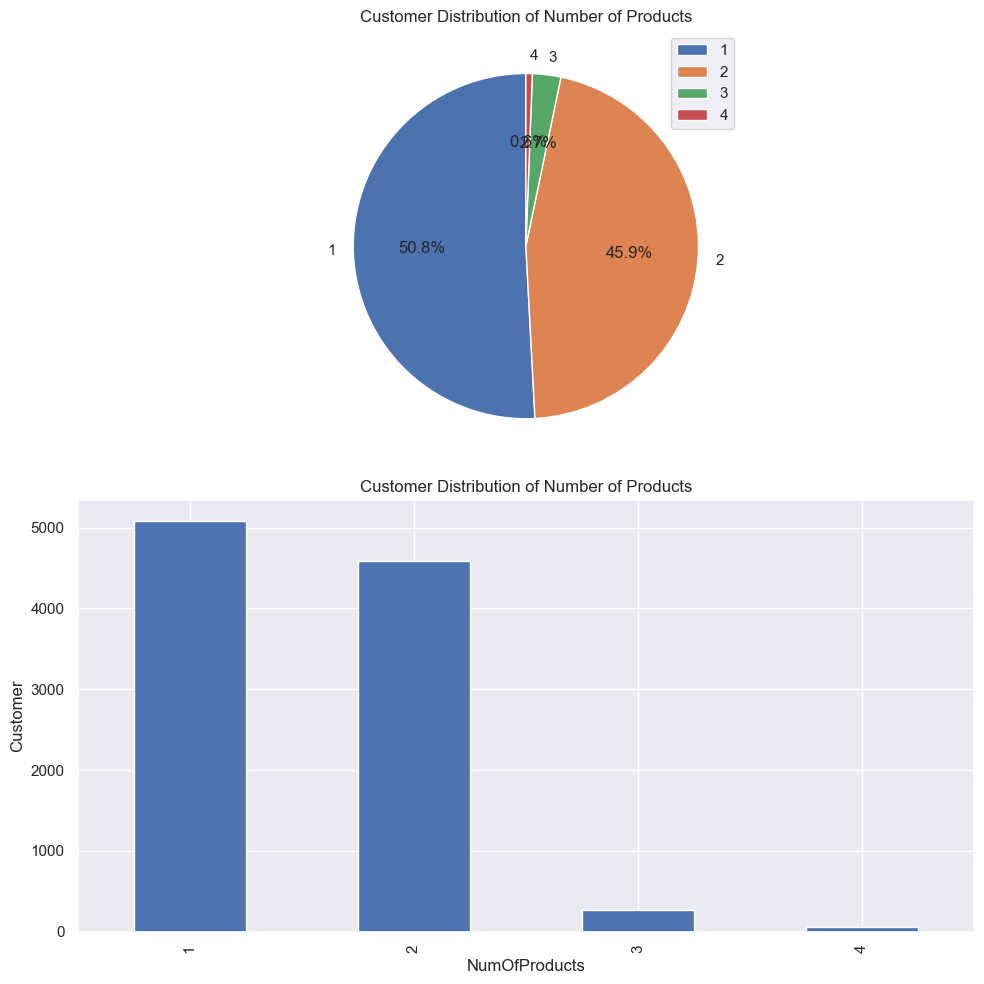

In [97]:
plot_pie_bar(df.groupby(['NumOfProducts']).size(), 'Number of Products')

In [ ]:
'''Observation 7
It can be clearly observed that around 96.7% majority of customers have purchased 1 to 2 products of the bank.
The high number of product purchased is not common as shown in the sample distribution.
'''

In [98]:
# Customer Distribution of Having Credit Card
df.groupby(['HasCrCard']).size()

# 0 means no credit card, 1 means having credit card

HasCrCard
0    2945
1    7055
dtype: int64

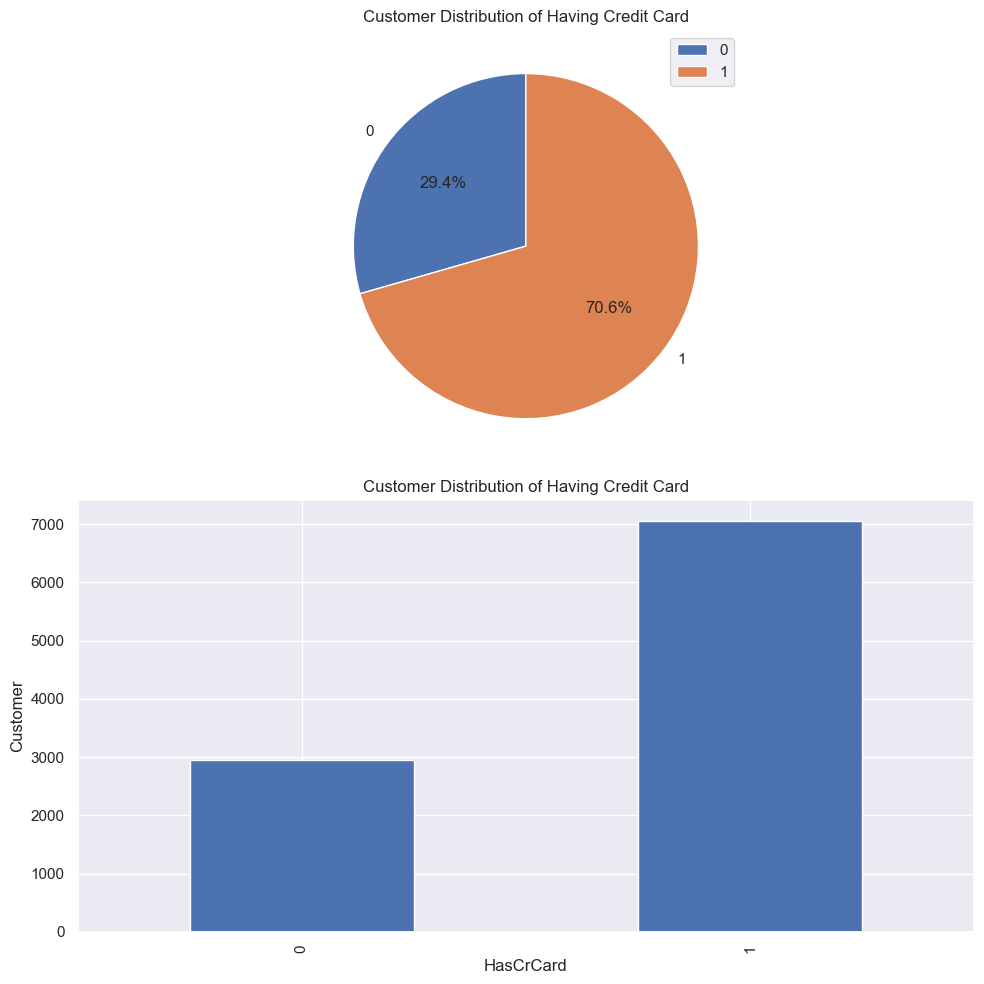

In [99]:
plot_pie_bar(df.groupby(['HasCrCard']).size(), 'Having Credit Card')

In [ ]:
'''Observation 8
Most of the customers (70.6%) in the sample are having credit card in the bank.
'''

In [100]:
# Customer Distribution of Active Member
df.groupby(['IsActiveMember']).size()

IsActiveMember
0    4849
1    5151
dtype: int64

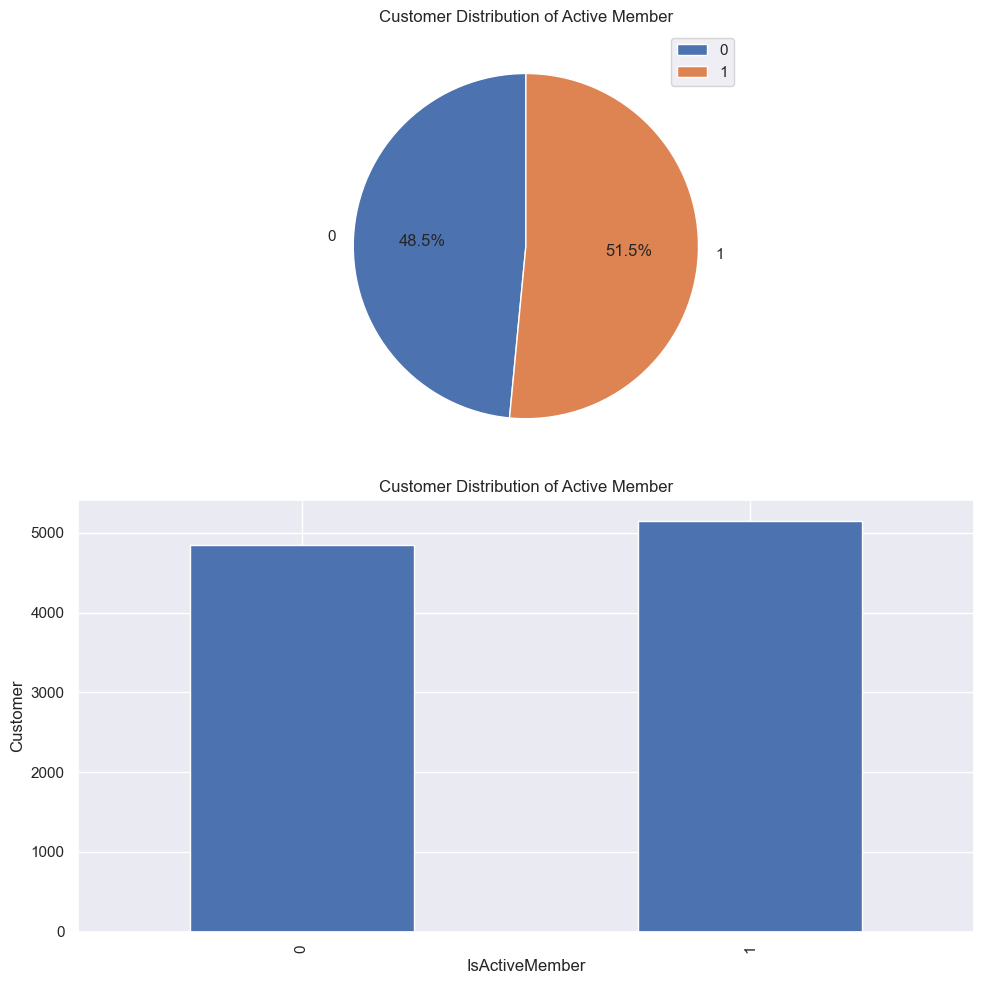

In [101]:
# 0 means for no, 1 means for yes
plot_pie_bar(df.groupby(['IsActiveMember']).size(), 'Active Member')

In [ ]:
'''Observation 9
The distribution of active member is even.
Checking this values can ensure the fairness of further analysis.
'''

In [102]:
# Customer Distribution of Exited Member
df.groupby(['Exited']).size()

Exited
0    7962
1    2038
dtype: int64

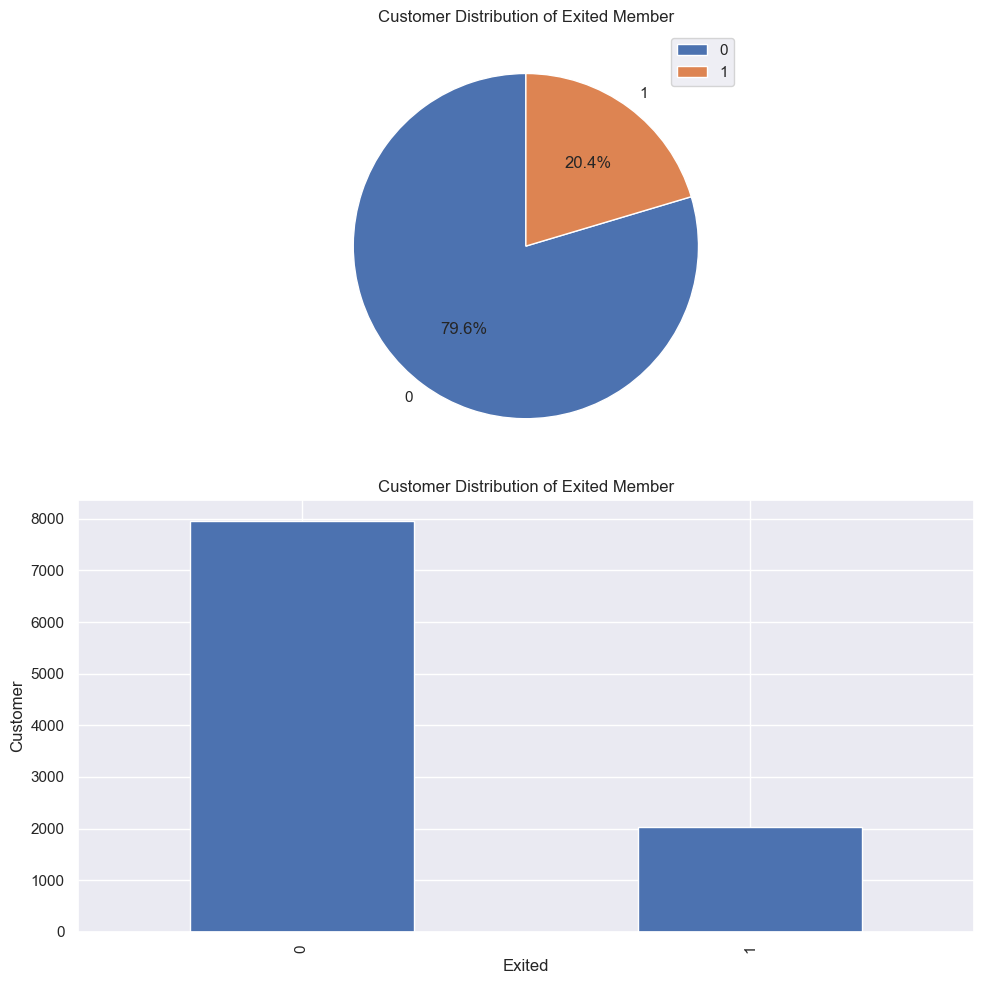

In [103]:
# 0 means for not exited, 1 means for exited
plot_pie_bar(df.groupby(['Exited']).size(), 'Exited Member')

In [ ]:
'''Observation 10
The majority (79.6%) of customer have not exited.
'''

In [104]:
# Customer Distribution of Complaint
df.groupby(['Complain']).size()

Complain
0    7956
1    2044
dtype: int64

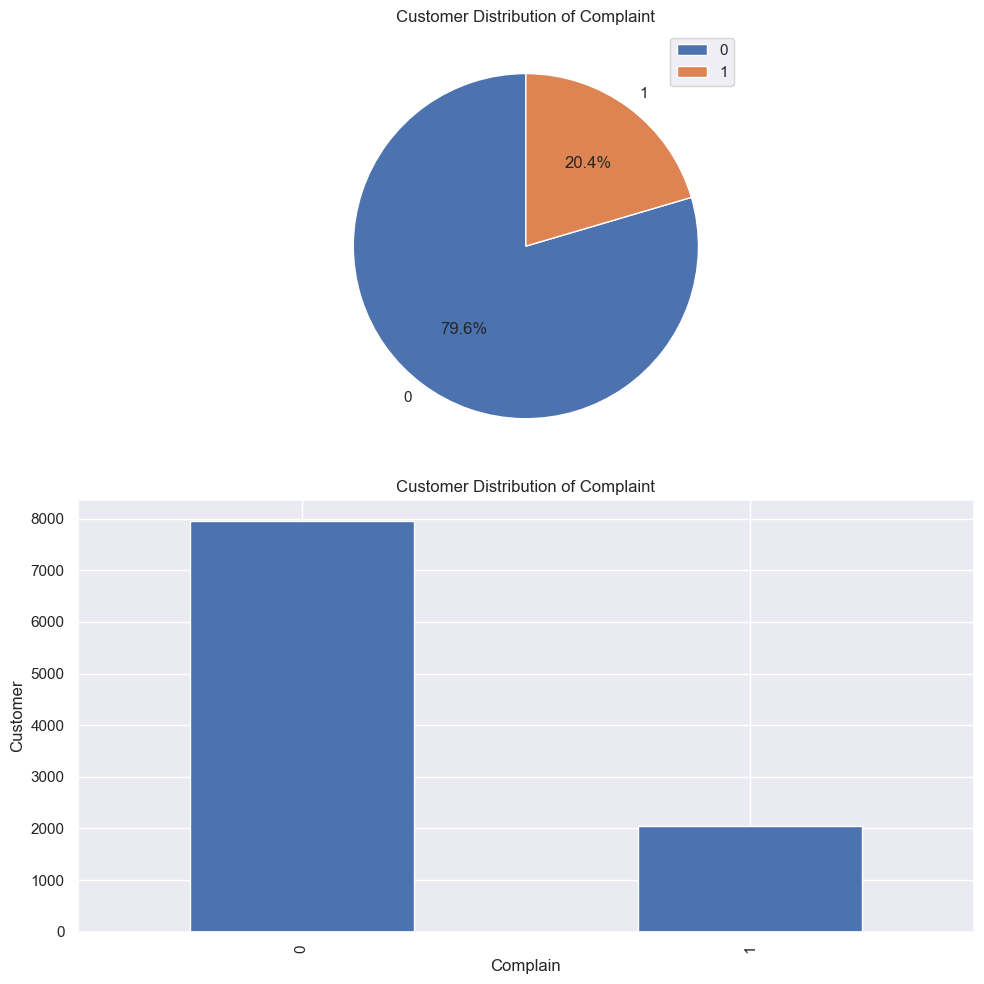

In [105]:
# 0 means for no, 1 means for yes
plot_pie_bar(df.groupby(['Complain']).size(), 'Complaint')

In [ ]:
'''Observation 11
The majority (79.6%) of customers have no complaint on the bank services.
It is an inspiring result for the bankers. 
'''

In [106]:
# Customer Distribution of Satisfaction Score
df.groupby(['Satisfaction Score']).size()

Satisfaction Score
1    1932
2    2014
3    2042
4    2008
5    2004
dtype: int64

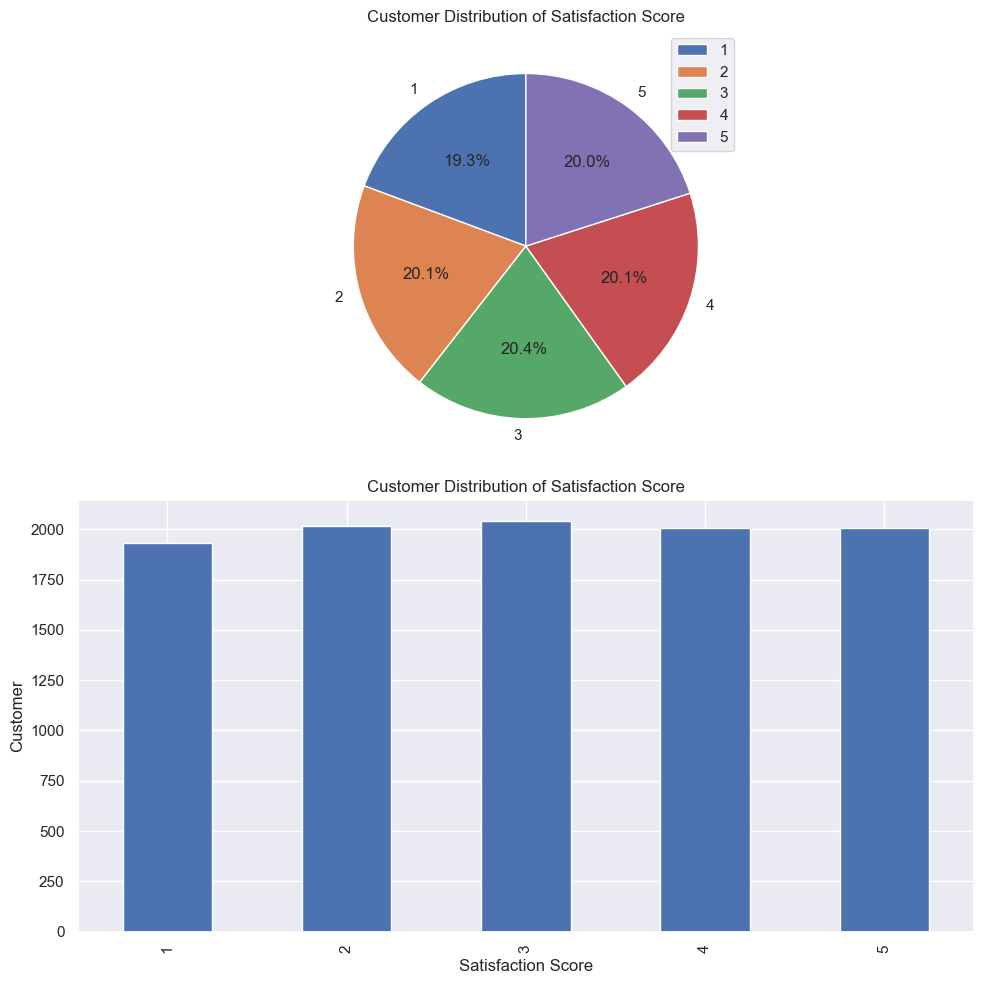

In [107]:
# 1 score is the lowest satisfactory, 5 is the most satisfactory
plot_pie_bar(df.groupby(['Satisfaction Score']).size(), 'Satisfaction Score')

In [ ]:
'''Observation 12
The satisfaction scores are evenly distributed.
'''

In [108]:
# Customer Distribution of Card Type
df.groupby(['Card Type']).size()

Card Type
DIAMOND     2507
GOLD        2502
PLATINUM    2495
SILVER      2496
dtype: int64

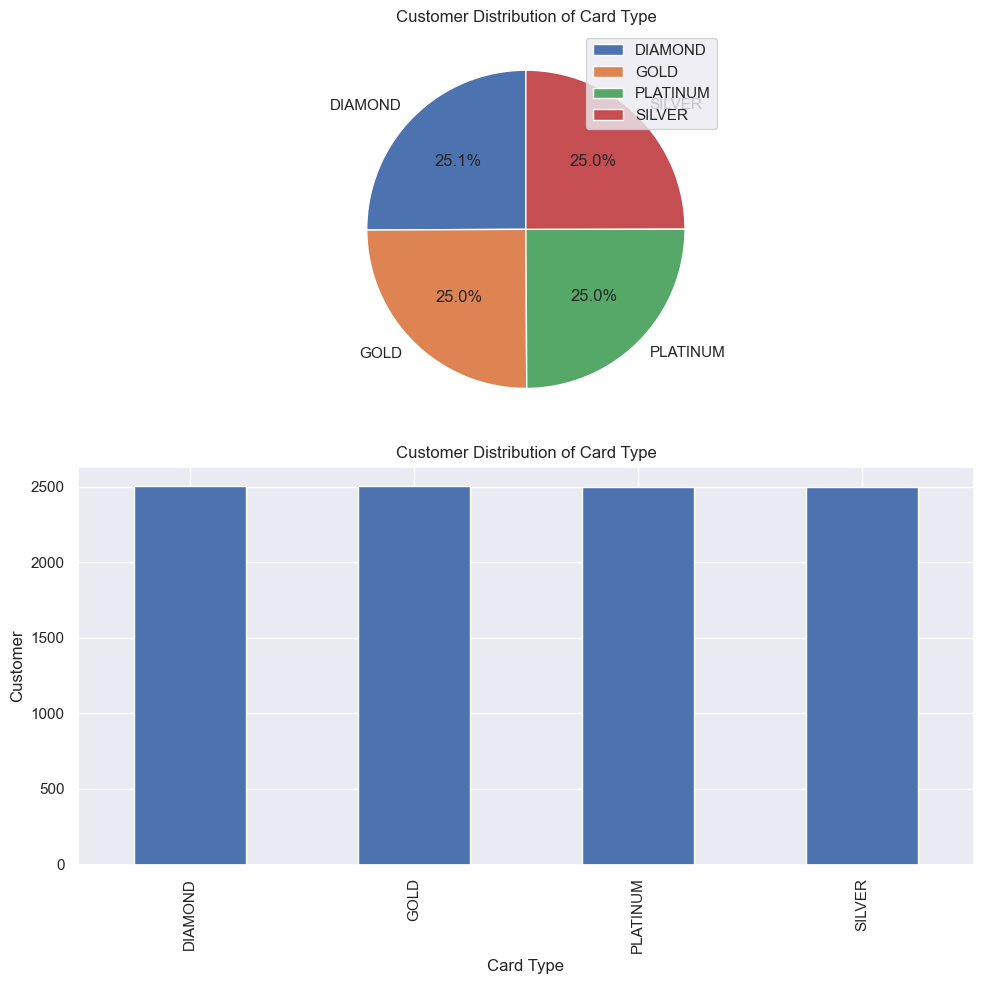

In [109]:
plot_pie_bar(df.groupby(['Card Type']).size(), 'Card Type')

In [ ]:
'''Observation 13
Evenly distribution for the card type information
'''

In [110]:
# Customer Distribution of Points Earned
df.groupby(['Point Earned']).size()

Point Earned
119      1
163      1
206      1
219     16
220      7
        ..
996      2
997     15
998     12
999      7
1000    13
Length: 785, dtype: int64

In [112]:
# Let's perform data binning for 5 different groups


point_bin = [0, 200, 400, 600, 800, 1001]
df_point = pd.cut(df['Point Earned'], point_bin)
df_point

0        (400, 600]
1        (400, 600]
2        (200, 400]
3        (200, 400]
4        (400, 600]
           ...     
9995     (200, 400]
9996     (600, 800]
9997     (400, 600]
9998     (200, 400]
9999    (800, 1001]
Name: Point Earned, Length: 10000, dtype: category
Categories (5, interval[int64, right]): [(0, 200] < (200, 400] < (400, 600] < (600, 800] < (800, 1001]]

In [113]:
pd.value_counts(df_point)

Point Earned
(400, 600]     2589
(600, 800]     2553
(800, 1001]    2501
(200, 400]     2355
(0, 200]          2
Name: count, dtype: int64

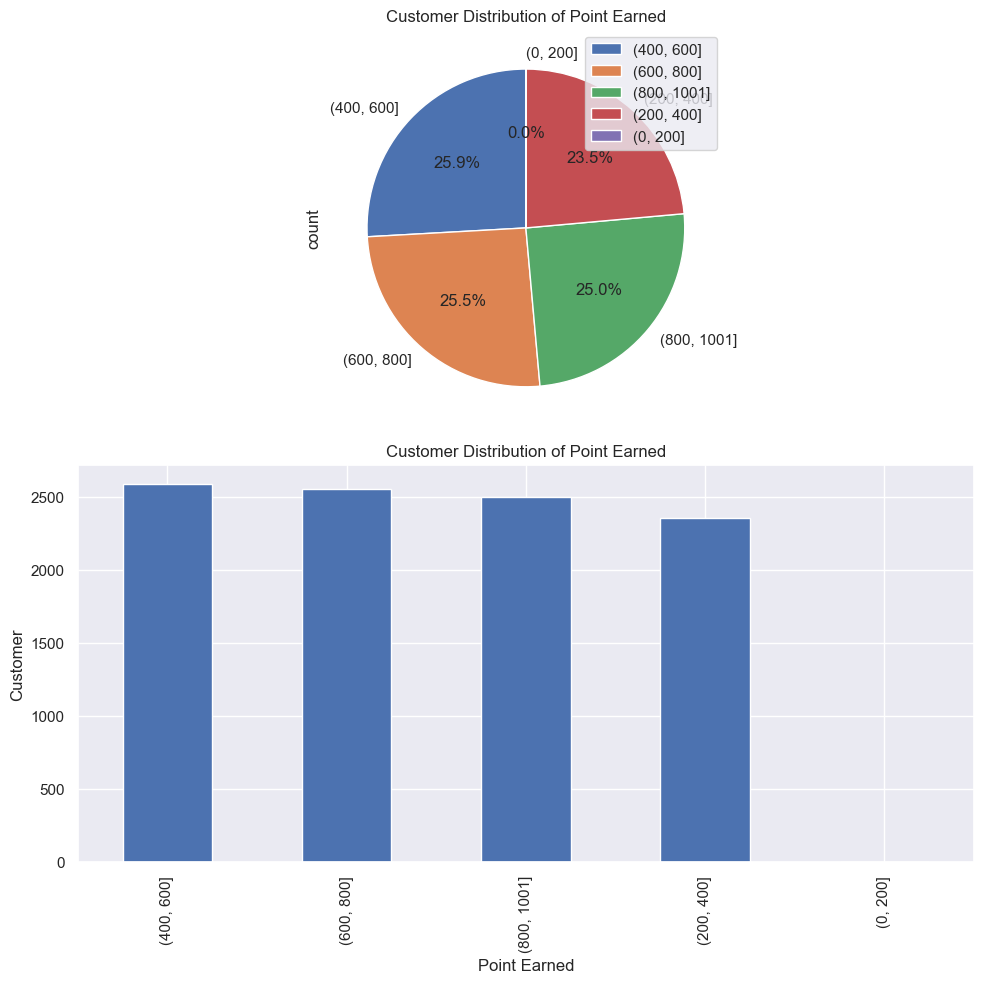

In [114]:
plot_pie_bar(pd.value_counts(df_point), 'Point Earned')

In [ ]:
'''Observation 14
Evenly dsitribution in point earned
'''

/Users/andychan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


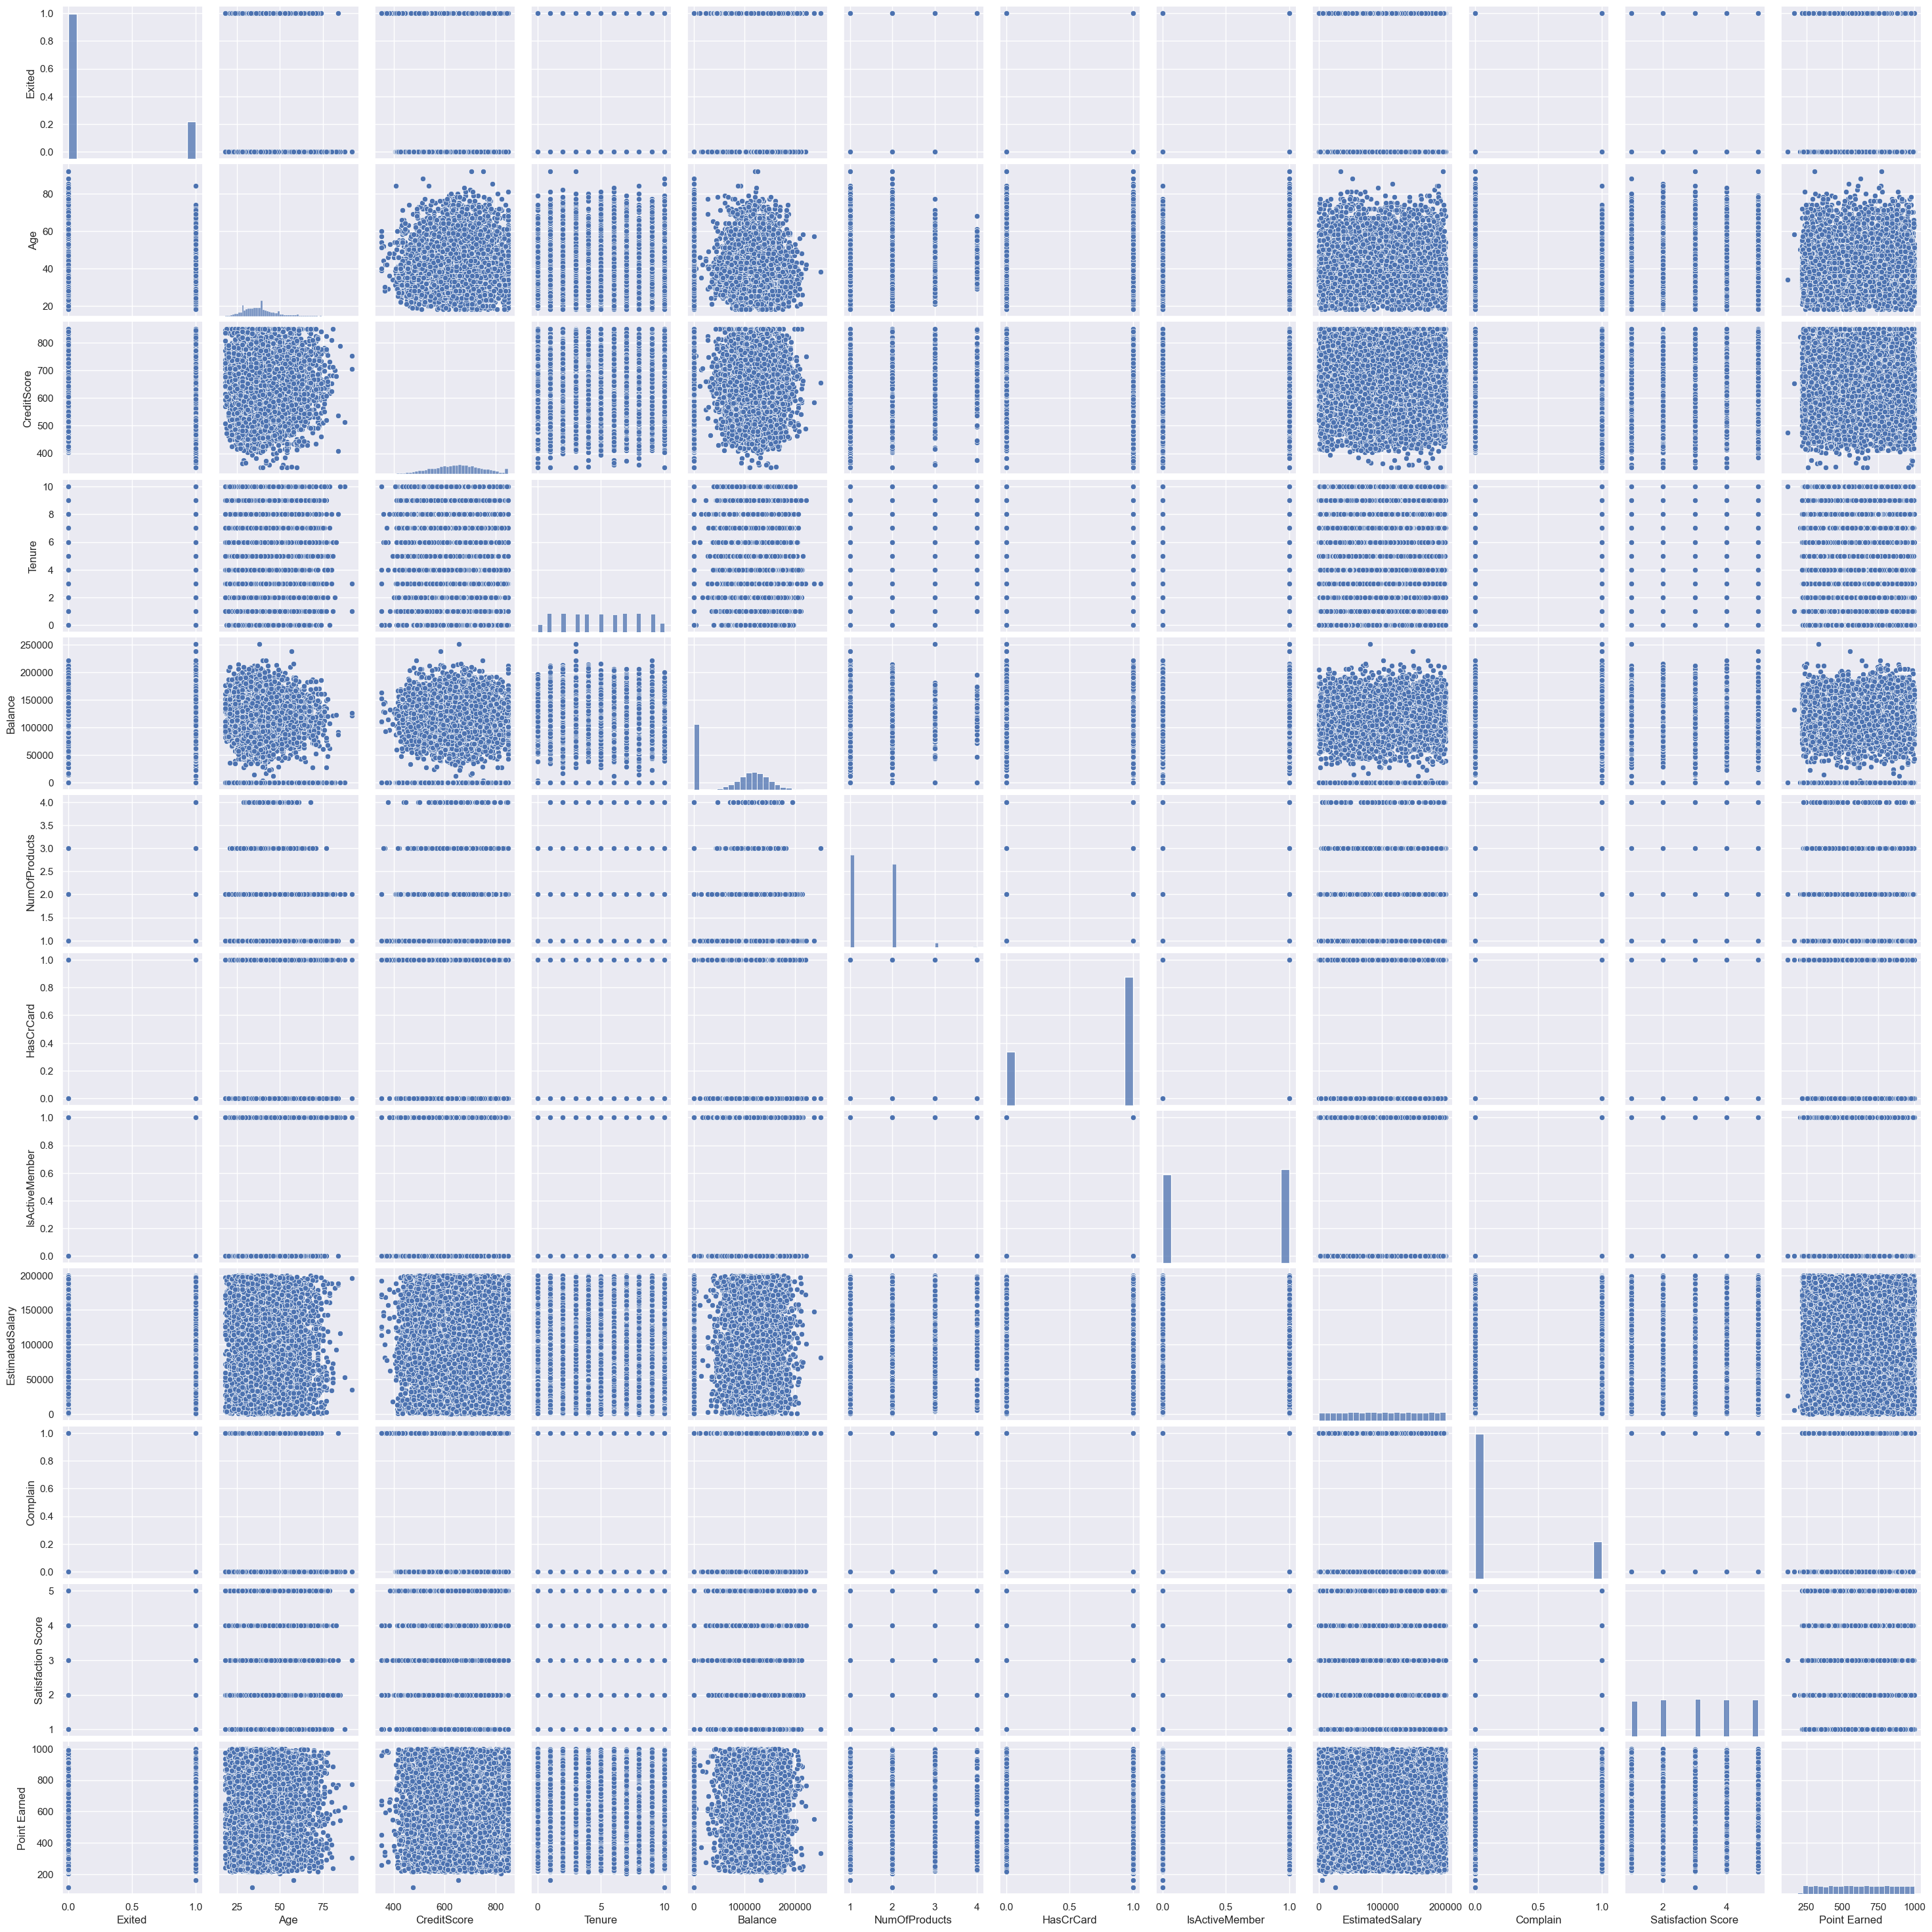

In [115]:
# Compare two columns for relationship insight
# Let's see any insight of customer churn between 
sns.pairplot(df[['Exited', 'Age', 'CreditScore', 'Gender', 'Tenure' , 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']])
plt.grid(True)
    
# For overview only

In [123]:
# Data analysis with two or more variables

def plot_bar_multi(dataset, variables):
    dataset.groupby(variables).size().unstack().plot(kind='bar')
    plt.title('Characteristics of Count Against {}'.format(variables[0]))
    plt.legend(loc = 'best', title=variables[1])
    plt.ylabel('Count')
    plt.grid(True)


In [130]:
df.groupby(['Gender', 'Exited']).size()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4558
        1          899
dtype: int64

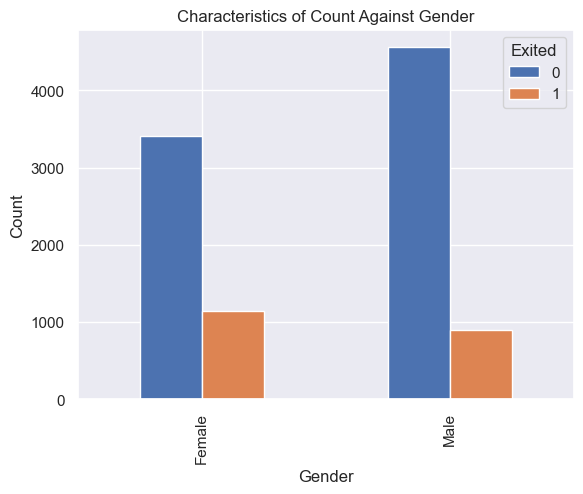

In [124]:
# Characteristics of count against gender
plot_bar_multi(df, ['Gender', 'Exited'])

In [133]:
# create pivot table for evaluation of exited rate
# for probability estimation
pd.pivot_table(df, index=['Gender'], values=['Exited'], margins=True)

Exited
Gender          
Female  0.250715
Male    0.164743
All     0.203800

In [ ]:
'''Insight for Relationship between Gender and Exited
For those who not exited, the quantity of male customers is larger than that of female customers.
However, the quantity of female exited customers is larger than that of males customers.

It is better to investigate the percentage of exited customers in their gender categories to estimate customer churn probabiility.
From above pivot table, we can know that there are around one-fourth of female customers have exited.
We can say that the female customers may have higher probability than male customers to exit in the sample case.

Therefore, it is interesting to think why female customers have higher customer churn rate.
For example, related to salary? Maybe local culture have gender stereotypes to recruit more male employee for higher salary, leading to stability in the bank services?
Or maybe the different consumer behaviour of female and male have influence of the result? 
'''

In [148]:
# Relationship between credit score and exited
# Let's save the faeture of credit score (FICO model)
df['CreditScore_Class'] = df_credit_score
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned CreditScore_Class  
0              464              Fair  
1              456              Fair  
2              377         Very Poor  
3              350              Good  
4              425       Exceptional  
...            ...               ...  
9995           300         Very Good  
9996           771         Very Poor  
9997           564              Good  
9998           339         Very Good  
9999           911         Very Good  

[10000 rows x 19 columns]

In [150]:
# Using the FICO classification, numerical table can be constructed
df.groupby(['CreditScore_Class', 'Exited']).size().unstack()

Exited                0    1
CreditScore_Class           
Very Poor          1863  530
Fair               2667  683
Good               1946  451
Very Good           968  247
Exceptional         518  127

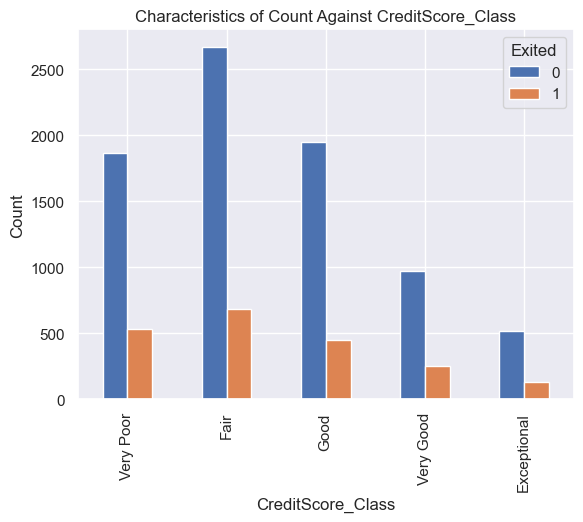

In [151]:
# plot graph
plot_bar_multi(df, ['CreditScore_Class', 'Exited'])

In [152]:
# probability calculation
pd.pivot_table(df, index=['CreditScore_Class'], values=['Exited'], margins=True)

Exited
CreditScore_Class          
Very Poor          0.221479
Fair               0.203881
Good               0.188152
Very Good          0.203292
Exceptional        0.196899
All                0.203800

In [ ]:
'''Insight for Relationship between CreditScore_Class and Exited
It is obvious to see the left-skewed bar chart for both exited and not exited trend.
Furthermore, the probability of each CreditScore_Class is around 20% in the corresponding class, 
very close to the total probability of the 10,000 samples, 20.38%.

It reflects that no matter which credit score the customers are having, 
there is still around one-fifth chance for the customers to exit.

As compared to gender-exited circumstance, it seems that gender have temporarily higher effect on churn rate.
'''

In [157]:
# Characteristics of count against age
# add feature to original dataset

df['age_group'] = df_age
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned CreditScore_Class    age_group  
0              464              Fair        Adult  
1              456              Fair        Adult  
2              377         Very Poor        Adult  
3              350              Good        Adult  
4              425       Exceptional        Adult  
...            ...               ...          ...  
9995           300         Very Good        Adult  
9996           771         Very Poor        Adult  
9997           564              Good        Adult  
9998           339         Very Good        Adult  
9999           911         Very Good  Young_Adult  

[10000 rows x 20 columns]

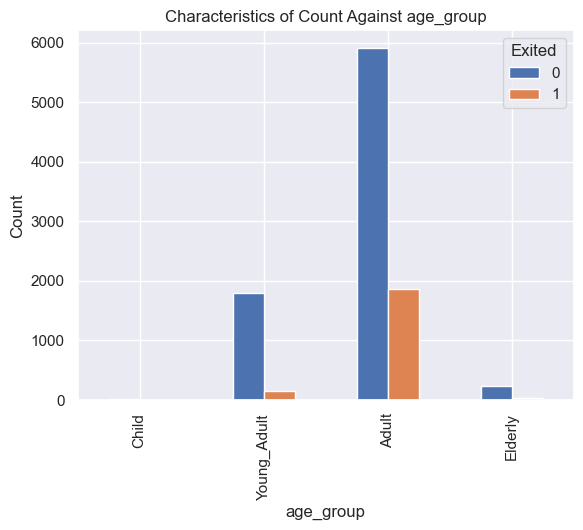

In [158]:
# Characteristics of count against age

plot_bar_multi(df, ['age_group', 'Exited'])

In [161]:
# probability of churn by age_group effect
pd.pivot_table(df, index=['age_group'], values=['Exited'], margins=True)

Exited
age_group            
Child        0.090909
Young_Adult  0.075026
Adult        0.238800
Elderly      0.132576
All          0.203800

In [ ]:
'''Insight on Relationship between age_group and exited
It is clear to find that the largest age_group for exited and not exited customers is the Adult group.
The reason is that the samples take large number of adult data (highest productivity group), and it actually match with the realistic situation as mentioned.

As shown in the pivot table, the probability for child, young_adult, elderly to exit is extremely low as compared to that of adult.
More interestingly, the probability of adult (23.88%) to exit is higher than the total probability of customer churn (20.38%).

It highlights the importance for a bank to mainly focus on the adult group with more support or strategies. 
Retaining more adult customers can considerably reduce the customer churn rate.
'''

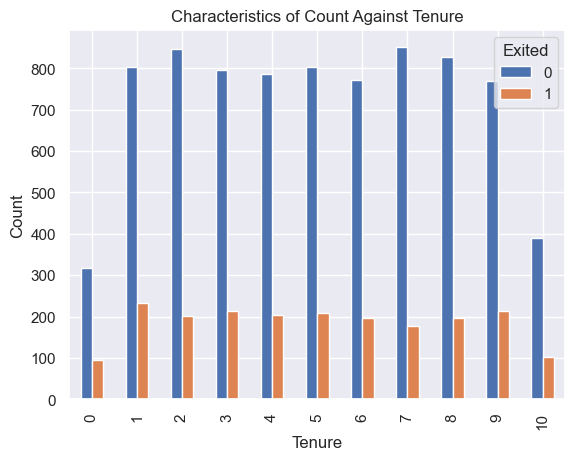

In [162]:
# Let's discover any findings with tenure
plot_bar_multi(df, ['Tenure', 'Exited'])

In [164]:
# calculate probability with pivot table
pd.pivot_table(df, index=['Tenure'], values=['Exited'], margins=True)

Exited
Tenure          
0       0.230024
1       0.224155
2       0.191794
3       0.211100
4       0.205258
5       0.206522
6       0.202689
7       0.172179
8       0.192195
9       0.217480
10      0.206122
All     0.203800

In [ ]:
'''Insight on Relationship between tenure and exited
Similar situation to CreditScore_Class,
The exit and non-exit bar charts are similar in distribution.
No matter how long the tenure is, the percentage of exiting is still around 20%.

Originally, I was thinking the longer tenure may have large impact on churn rate, 
because I assume that older customers should be more loyal and stable in the bank.

As proved by the bar charts and pivot, the original hypothesis statement is not a must.
It is common that advanced bank services provided for the longer tenure customers is more attracting,
the above may imply that tenure actually is not the major factors for customers to leave the bank.

There may be other important parameters, which do larger influence on customer churn rate.
'''

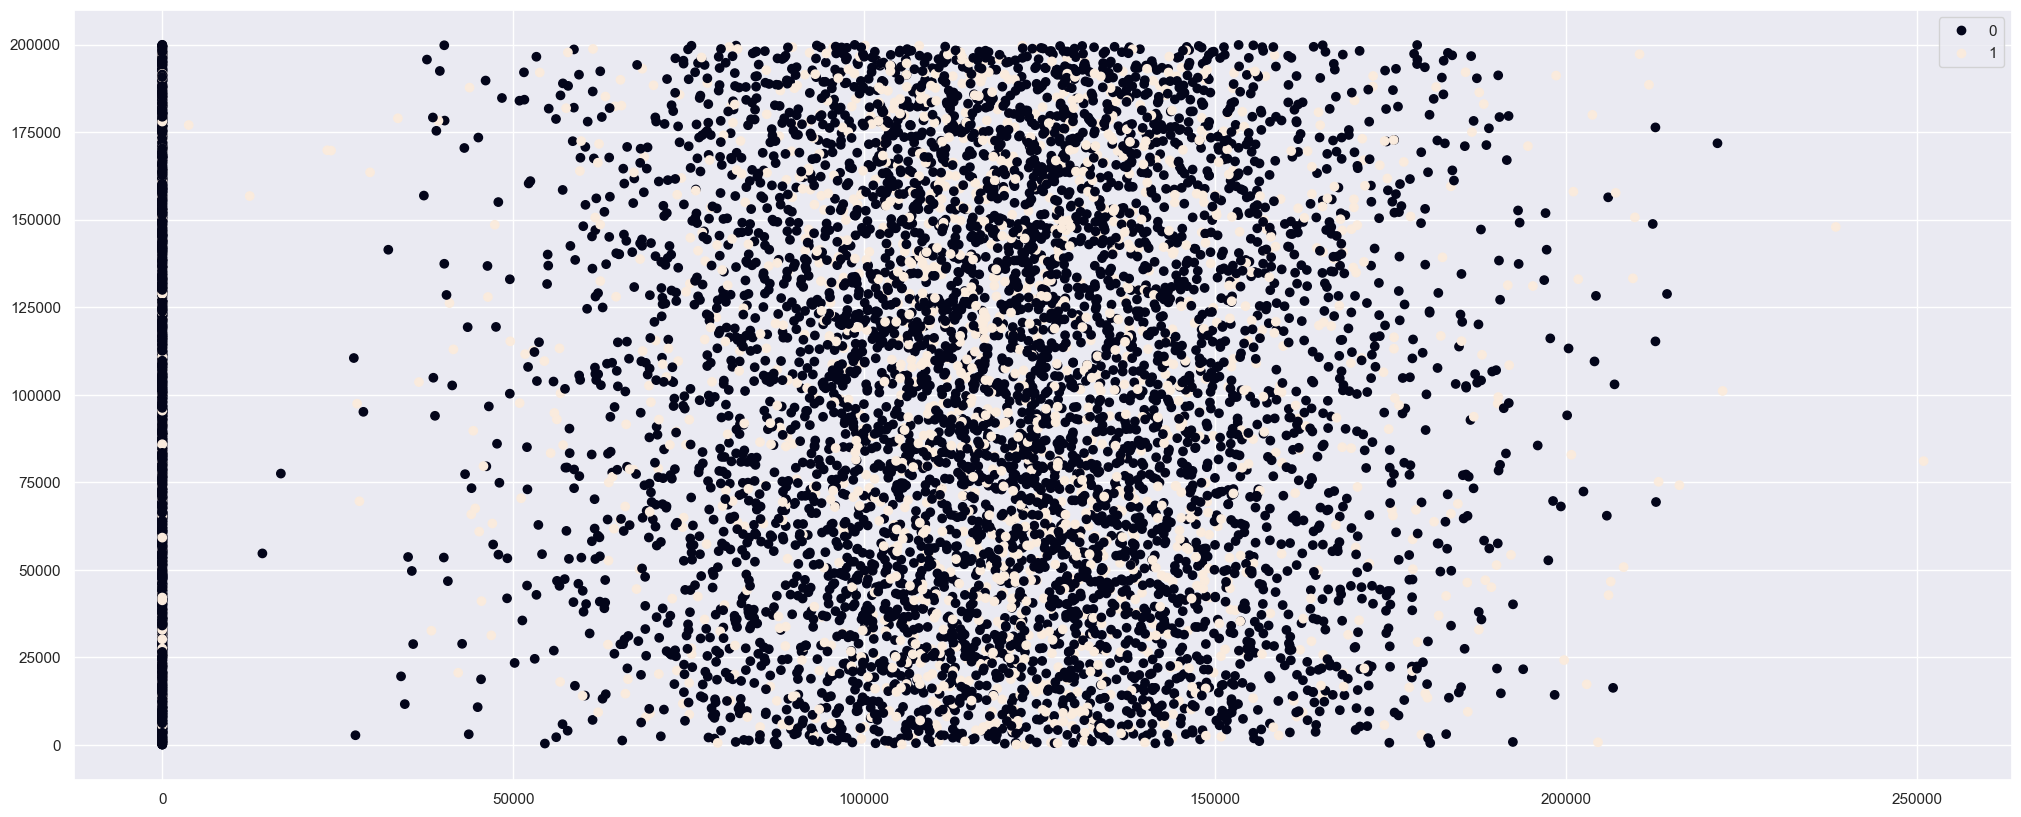

In [177]:
# Balance, salary, exited relationship
# As discussed, it is interesting to see relationship between balance and salary
# fast scatter plot first
plt.figure(figsize=(25, 10))
scatter = plt.scatter(df.Balance, df.EstimatedSalary, c=df.Exited)
plt.legend(*scatter.legend_elements())

In [193]:
# better to perform bar chart with clearer data visualization
# Add the category as features into dataset

df['Balance_Group'] = pd.cut(df.Balance, 5, labels=['Below 50,000', '50,000 - 100,000', '100,000 - 150,000', '150,000 - 200,000', '200,000 - 250,000'])
df['Salary_Group'] = pd.cut(df.EstimatedSalary, 5)
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  ...  EstimatedSalary  Exited  \
0          2       0.00              1  ...        101348.88       1   
1          1   83807.86              1  ...        112542.58       0   
2          8  159660.80              3  ...        113931.57       1   
3          1       0.00              2  ...         93826.63       0   
4          2  125510.82              1  ...         79084.10       0   
...      ...        ...            ...  ...              ...     ...   
9995       5       0.00              2  ...         96270.64       0   
9996      10   57369.61              1  ...        101699.77       0   
9997       7       0.00              1  ...         42085.58       1   
9998       3   75075.31              2  ...         92888.52       1   
9999       4  130142.79              1  ...         38190.78       0   

      Complain  Satisfaction Score  Card Type  Point Earned CreditScore_Class  \
0            1                   2    DIAMOND           464              Fair   
1            1                   3    DIAMOND           456              Fair   
2            1                   3    DIAMOND           377         Very Poor   
3            0                   5       GOLD           350              Good   
4            0                   5       GOLD           425       Exceptional   
...        ...                 ...        ...           ...               ...   
9995         0                   1    DIAMOND           300         Very Good   
9996         0                   5   PLATINUM           771         Very Poor   
9997         1                   3     SILVER           564              Good   
9998         1                   2       GOLD           339         Very Good   
9999         0                   3    DIAMOND           911         Very Good   

        age_group      Balance_Group           Salary_Group  
0           Adult       Below 50,000  (80003.94, 120000.12]  
1           Adult   50,000 - 100,000  (80003.94, 120000.12]  
2           Adult  150,000 - 200,000  (80003.94, 120000.12]  
3           Adult       Below 50,000  (80003.94, 120000.12]  
4           Adult  100,000 - 150,000   (40007.76, 80003.94]  
...           ...                ...                    ...  
9995        Adult       Below 50,000  (80003.94, 120000.12]  
9996        Adult   50,000 - 100,000  (80003.94, 120000.12]  
9997        Adult       Below 50,000   (40007.76, 80003.94]  
9998        Adult   50,000 - 100,000  (80003.94, 120000.12]  
9999  Young_Adult  100,000 - 150,000   (-188.401, 40007.76]  

[10000 rows x 22 columns]

In [194]:
df.groupby(['Balance_Group', 'Salary_Group', 'Exited']).size().unstack()

Exited                                     0    1
Balance_Group     Salary_Group                   
Below 50,000      (-188.401, 40007.76]   642  100
                  (40007.76, 80003.94]   633  102
                  (80003.94, 120000.12]  661  109
                  (120000.12, 159996.3]  625   98
                  (159996.3, 199992.48]  605  117
50,000 - 100,000  (-188.401, 40007.76]   247   56
                  (40007.76, 80003.94]   261   52
                  (80003.94, 120000.12]  239   71
                  (120000.12, 159996.3]  241   60
                  (159996.3, 199992.48]  238   68
100,000 - 150,000 (-188.401, 40007.76]   525  197
                  (40007.76, 80003.94]   583  212
                  (80003.94, 120000.12]  581  179
                  (120000.12, 159996.3]  570  191
                  (159996.3, 199992.48]  582  208
150,000 - 200,000 (-188.401, 40007.76]   146   39
                  (40007.76, 80003.94]   150   32
                  (80003.94, 120000.12]  138   45
                  (120000.12, 159996.3]  147   47
                  (159996.3, 199992.48]  135   36
200,000 - 250,000 (-188.401, 40007.76]     1    2
                  (40007.76, 80003.94]     3    5
                  (80003.94, 120000.12]    3    3
                  (120000.12, 159996.3]    4    6
                  (159996.3, 199992.48]    2    3

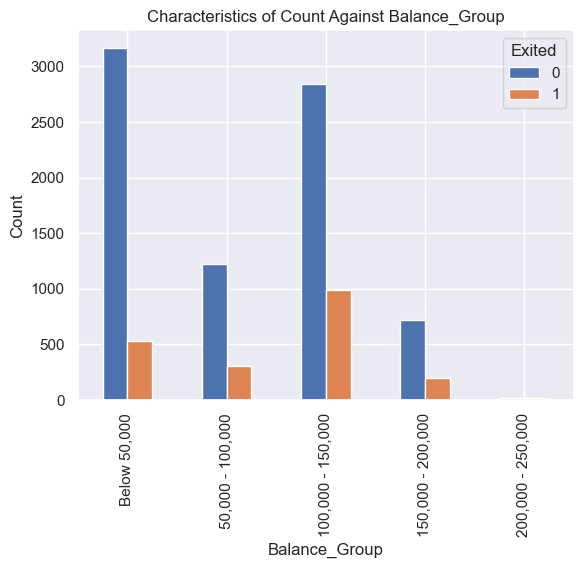

In [195]:
plot_bar_multi(df, ['Balance_Group', 'Exited'])


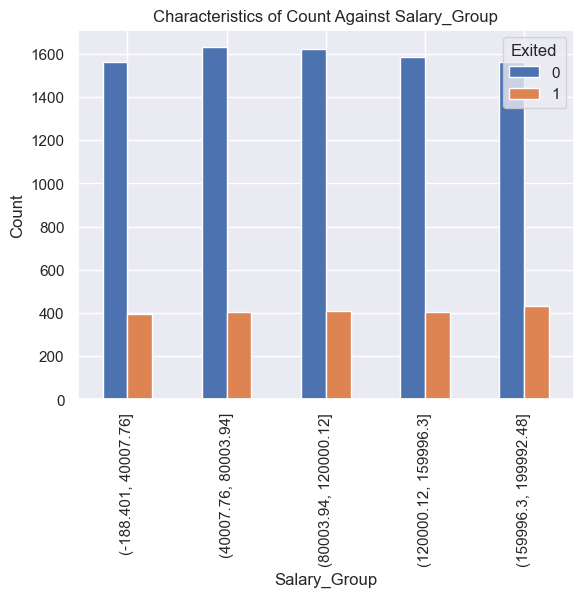

In [196]:
plot_bar_multi(df, ['Salary_Group', 'Exited'])

In [197]:
# pivot table for probability for three variables
pd.pivot_table(df, index=['Balance_Group'], columns=['Salary_Group'], values=['Exited'], margins=True)

Exited                       \
Salary_Group      (-188.401, 40007.76] (40007.76, 80003.94]   
Balance_Group                                                 
Below 50,000                  0.134771             0.138776   
50,000 - 100,000              0.184818             0.166134   
100,000 - 150,000             0.272853             0.266667   
150,000 - 200,000             0.210811             0.175824   
200,000 - 250,000             0.666667             0.625000   
All                           0.201535             0.198229   

                                                               \
Salary_Group      (80003.94, 120000.12] (120000.12, 159996.3]   
Balance_Group                                                   
Below 50,000                   0.141558              0.135546   
50,000 - 100,000               0.229032              0.199336   
100,000 - 150,000              0.235526              0.250986   
150,000 - 200,000              0.245902              0.242268   
200,000 - 250,000              0.500000              0.600000   
All                            0.200591              0.202112   

                                                   
Salary_Group      (159996.3, 199992.48]       All  
Balance_Group                                      
Below 50,000                   0.162050  0.142470  
50,000 - 100,000               0.222222  0.200261  
100,000 - 150,000              0.263291  0.257837  
150,000 - 200,000              0.210526  0.217486  
200,000 - 250,000              0.600000  0.593750  
All                            0.216650  0.203800

In [198]:
# pivot table between balance_group and exited
pd.pivot_table(df, index=['Balance_Group'], values=['Exited'], margins=True)

Exited
Balance_Group              
Below 50,000       0.142470
50,000 - 100,000   0.200261
100,000 - 150,000  0.257837
150,000 - 200,000  0.217486
200,000 - 250,000  0.593750
All                0.203800

In [199]:
# pivot table between salary_group and exited
pd.pivot_table(df, index=['Salary_Group'], values=['Exited'], margins=True)

Exited
Salary_Group                   
(-188.401, 40007.76]   0.201535
(40007.76, 80003.94]   0.198229
(80003.94, 120000.12]  0.200591
(120000.12, 159996.3]  0.202112
(159996.3, 199992.48]  0.216650
All                    0.203800

In [ ]:
'''Insight on Relationship of Balance, Salary and Exited
As shown in the pivot tables and bar chart, 
The customers, who having balance under $50,000 and salary under $40,000, acoount for the lowest probability customers group to exit (13.48%).
The highest probability belong to those who have balance above $200,000.
However, it is non-sense to make conclusion with the highest probability due to the extremely low quantity of data with balance above 200,000.

In this analysis case, I would like to recognize the data with balance above $200,000 as outlier and ignore them for higher accuracy of analysis.

Interestingly, the probability of exited customers with balance of $100,000 to $150,000 is quite high (25.78%, higher than total churn probability of customers).
As we know, the customers with higher balance should be loyal to stay in the bank.

Combining this findings with metnioned tenure circumstance, 
there is several interesting insight.

Customer balance may be one of the important parameter influencing the customer churn rate as compared to tenure. 
Long tenure may not be the main reason for staying and cannot guarantee low customer churn rate.
Thess findings may suggest that customers in recent ceuntry may tend to be attracted by welcome gift offer to save little balance in their bank account,
but may not consider loyality as important factors to stay in the bank.
Once they have saved certain level of balance like above $100,000, customers may also have higher probability to consider exiting.
The potential reason may be other attraction from other bank with new welcome gift offer or alternative incentives.

Therefore, the data highlights the importance of keeping old customers with middle level of balance. 
Retaining this target group customers can be one of the strengthness in SWOT analysis of a bank among market cmpetition.
Higher discount offer for financial products may be suggested for those customers with high tenure and high balance to prevent high churn rate.
'''

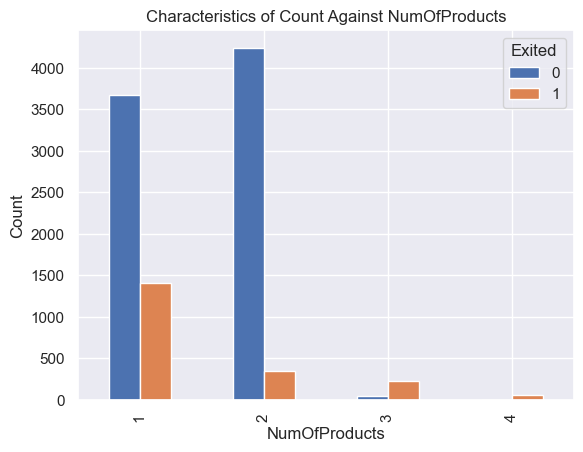

In [201]:
# Reagrding to incentive, let's see the relationship with number of products, credit card, exited
# Characteristics of count against NumOfProducts
plot_bar_multi(df, ['NumOfProducts', 'Exited'])

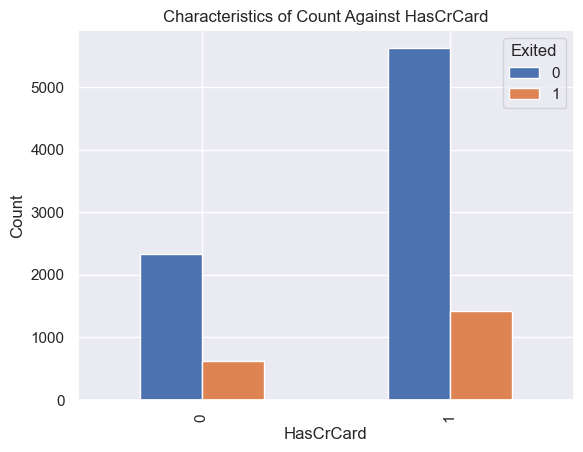

In [202]:
# Characteristics of Count against HasCrCard
plot_bar_multi(df, ['HasCrCard', 'Exited'])

In [203]:
# create pivot table
pd.pivot_table(df, index=['NumOfProducts'], columns=['HasCrCard'], values=['Exited'], margins=True)

Exited                    
HasCrCard             0         1       All
NumOfProducts                              
1              0.277556  0.276970  0.277144
2              0.083333  0.073013  0.076035
3              0.842105  0.821053  0.827068
4              1.000000  1.000000  1.000000
All            0.208149  0.201984  0.203800

In [204]:
# between NumOfProduct and Exited
pd.pivot_table(df, index=['NumOfProducts'], values=['Exited'], margins=True)

Exited
NumOfProducts          
1              0.277144
2              0.076035
3              0.827068
4              1.000000
All            0.203800

In [205]:
# between HasCrCard and Exited
pd.pivot_table(df, index=['HasCrCard'], values=['Exited'], margins=True)

Exited
HasCrCard          
0          0.208149
1          0.201984
All        0.203800

In [ ]:
'''Insight on relationship of number of products, credit card and exited
Although the customer data above 4 number of products may be a outlier,
the trend of number of products data can also reflect that
the more the number of products owned, the lower churn rate will be.

Having a credit card or not is not the major factor on customer churn 
because the corresponding probability is similar to the overall customer churn probability does.

Any suggestion:
One of the recommeded banking strategy is to strengthen the purchasing rate of products in order to retain customers with high balance and tenure.
For example, higher discounts of products
Set priority rule for those target customers with five tenure to purchase products
After having $100,000 balance or above, provide extra earn points or cashback for credit card.
Higher saving interest for those who having $150,000 or above.
'''

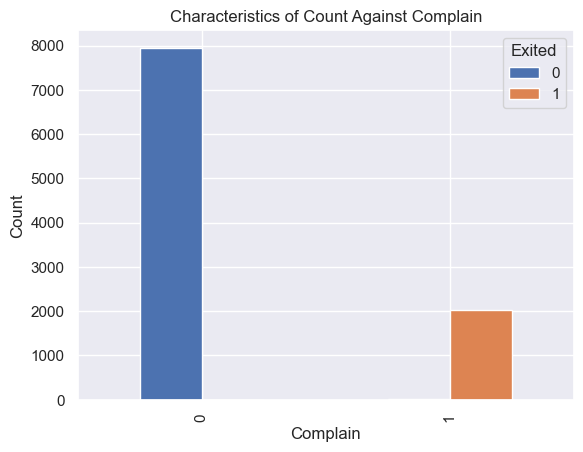

In [206]:
# Relationship of Complain, Satisfaction, Exited
plot_bar_multi(df, ['Complain', 'Exited'])


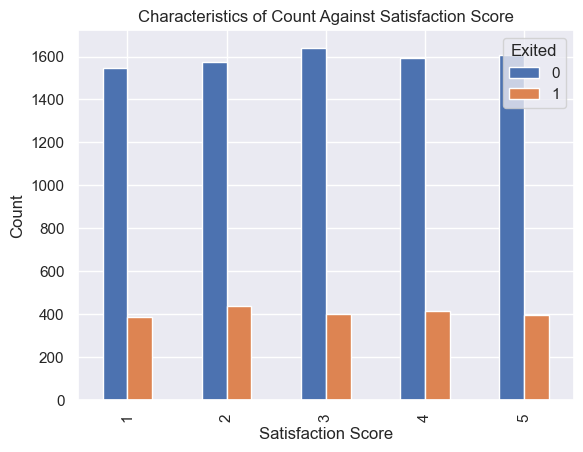

In [209]:
plot_bar_multi(df, ['Satisfaction Score', 'Exited'])

In [210]:
# create pivot table
pd.pivot_table(df, index=['Complain'], columns=['Satisfaction Score'], values=['Exited'], margins=True)

Exited                                                  
Satisfaction Score         1         2         3         4         5       All
Complain                                                                      
0                   0.000647  0.001269  0.000000  0.000627  0.000000  0.000503
1                   0.997416  0.997717  0.987685  1.000000  0.992500  0.995108
All                 0.200311  0.217974  0.196376  0.206175  0.198104  0.203800

In [211]:
# relationship between complain and exited
pd.pivot_table(df, index=['Complain'], values=['Exited'], margins=True)

Exited
Complain          
0         0.000503
1         0.995108
All       0.203800

In [212]:
# relationship between satisfaction score and exited
pd.pivot_table(df, index=['Satisfaction Score'], values=['Exited'], margins=True)

Exited
Satisfaction Score          
1                   0.200311
2                   0.217974
3                   0.196376
4                   0.206175
5                   0.198104
All                 0.203800

In [ ]:
'''Insight on relationship of complain, satisfaction score and exited
It is very obvious to see that extremely high probability of customers (99.5%) with complaint experience to exit the bank.

Comparing to the variable of complain, satisfaction score may not have high impact on exiting or not.

This findings suggest the insight that effort for complaint prevention is the key to retain customers, no matter how high the satisfaction score is.
Certain key performance index may be constructed with complaint number.
For example, keeping complaint number to be less than 20% of total customers in each month.
The reason of setting < 20% complaint cases is that the complaint probability in overall customers is around 20%.
In short term, the bank can set KPI with less than 20% complaint first.
In long term, the bank can also set KPI with lower number of complaint and the average satisfaction score to be above 4.
'''

In [247]:
# Attempt for correlation matrix to see any different insight as found
# Before correlation analysis, let's copy another set of data and remove some irrelvant data columns

df_irrel = ['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Card Type', 'CreditScore_Class', 'age_group', 'Balance_Group', 'Salary_Group', 'Gender']
df_backup = df
for i in range(len(df_irrel)):
    df_backup = df_backup.drop(df_irrel[i], axis=1)

df_corr = df_backup.corr()
df_corr

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                   -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                 0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance                0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts          0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard             -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember         0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary       -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited                -0.026771  0.285296 -0.013656  0.118577      -0.047611   
Complain              -0.027048  0.283530 -0.013047  0.119124      -0.046357   
Satisfaction Score    -0.012599 -0.000876  0.008663 -0.002588      -0.011394   
Point Earned           0.000077  0.002222 -0.010196  0.014608      -0.015330   

                    HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
CreditScore         -0.005458        0.025651        -0.001384 -0.026771   
Age                 -0.011721        0.085472        -0.007201  0.285296   
Tenure               0.022583       -0.028362         0.007784 -0.013656   
Balance             -0.014858       -0.010084         0.012797  0.118577   
NumOfProducts        0.003183        0.009612         0.014204 -0.047611   
HasCrCard            1.000000       -0.011866        -0.009933 -0.006976   
IsActiveMember      -0.011866        1.000000        -0.011421 -0.156356   
EstimatedSalary     -0.009933       -0.011421         1.000000  0.012490   
Exited              -0.006976       -0.156356         0.012490  1.000000   
Complain            -0.007095       -0.154741         0.012494  0.995693   
Satisfaction Score  -0.000212        0.010236        -0.013747 -0.005849   
Point Earned        -0.011041       -0.004983        -0.001515 -0.004628   

                    Complain  Satisfaction Score  Point Earned  
CreditScore        -0.027048           -0.012599      0.000077  
Age                 0.283530           -0.000876      0.002222  
Tenure             -0.013047            0.008663     -0.010196  
Balance             0.119124           -0.002588      0.014608  
NumOfProducts      -0.046357           -0.011394     -0.015330  
HasCrCard          -0.007095           -0.000212     -0.011041  
IsActiveMember     -0.154741            0.010236     -0.004983  
EstimatedSalary     0.012494           -0.013747     -0.001515  
Exited              0.995693           -0.005849     -0.004628  
Complain            1.000000           -0.004799     -0.002893  
Satisfaction Score -0.004799            1.000000     -0.014400  
Point Earned       -0.002893           -0.014400      1.000000

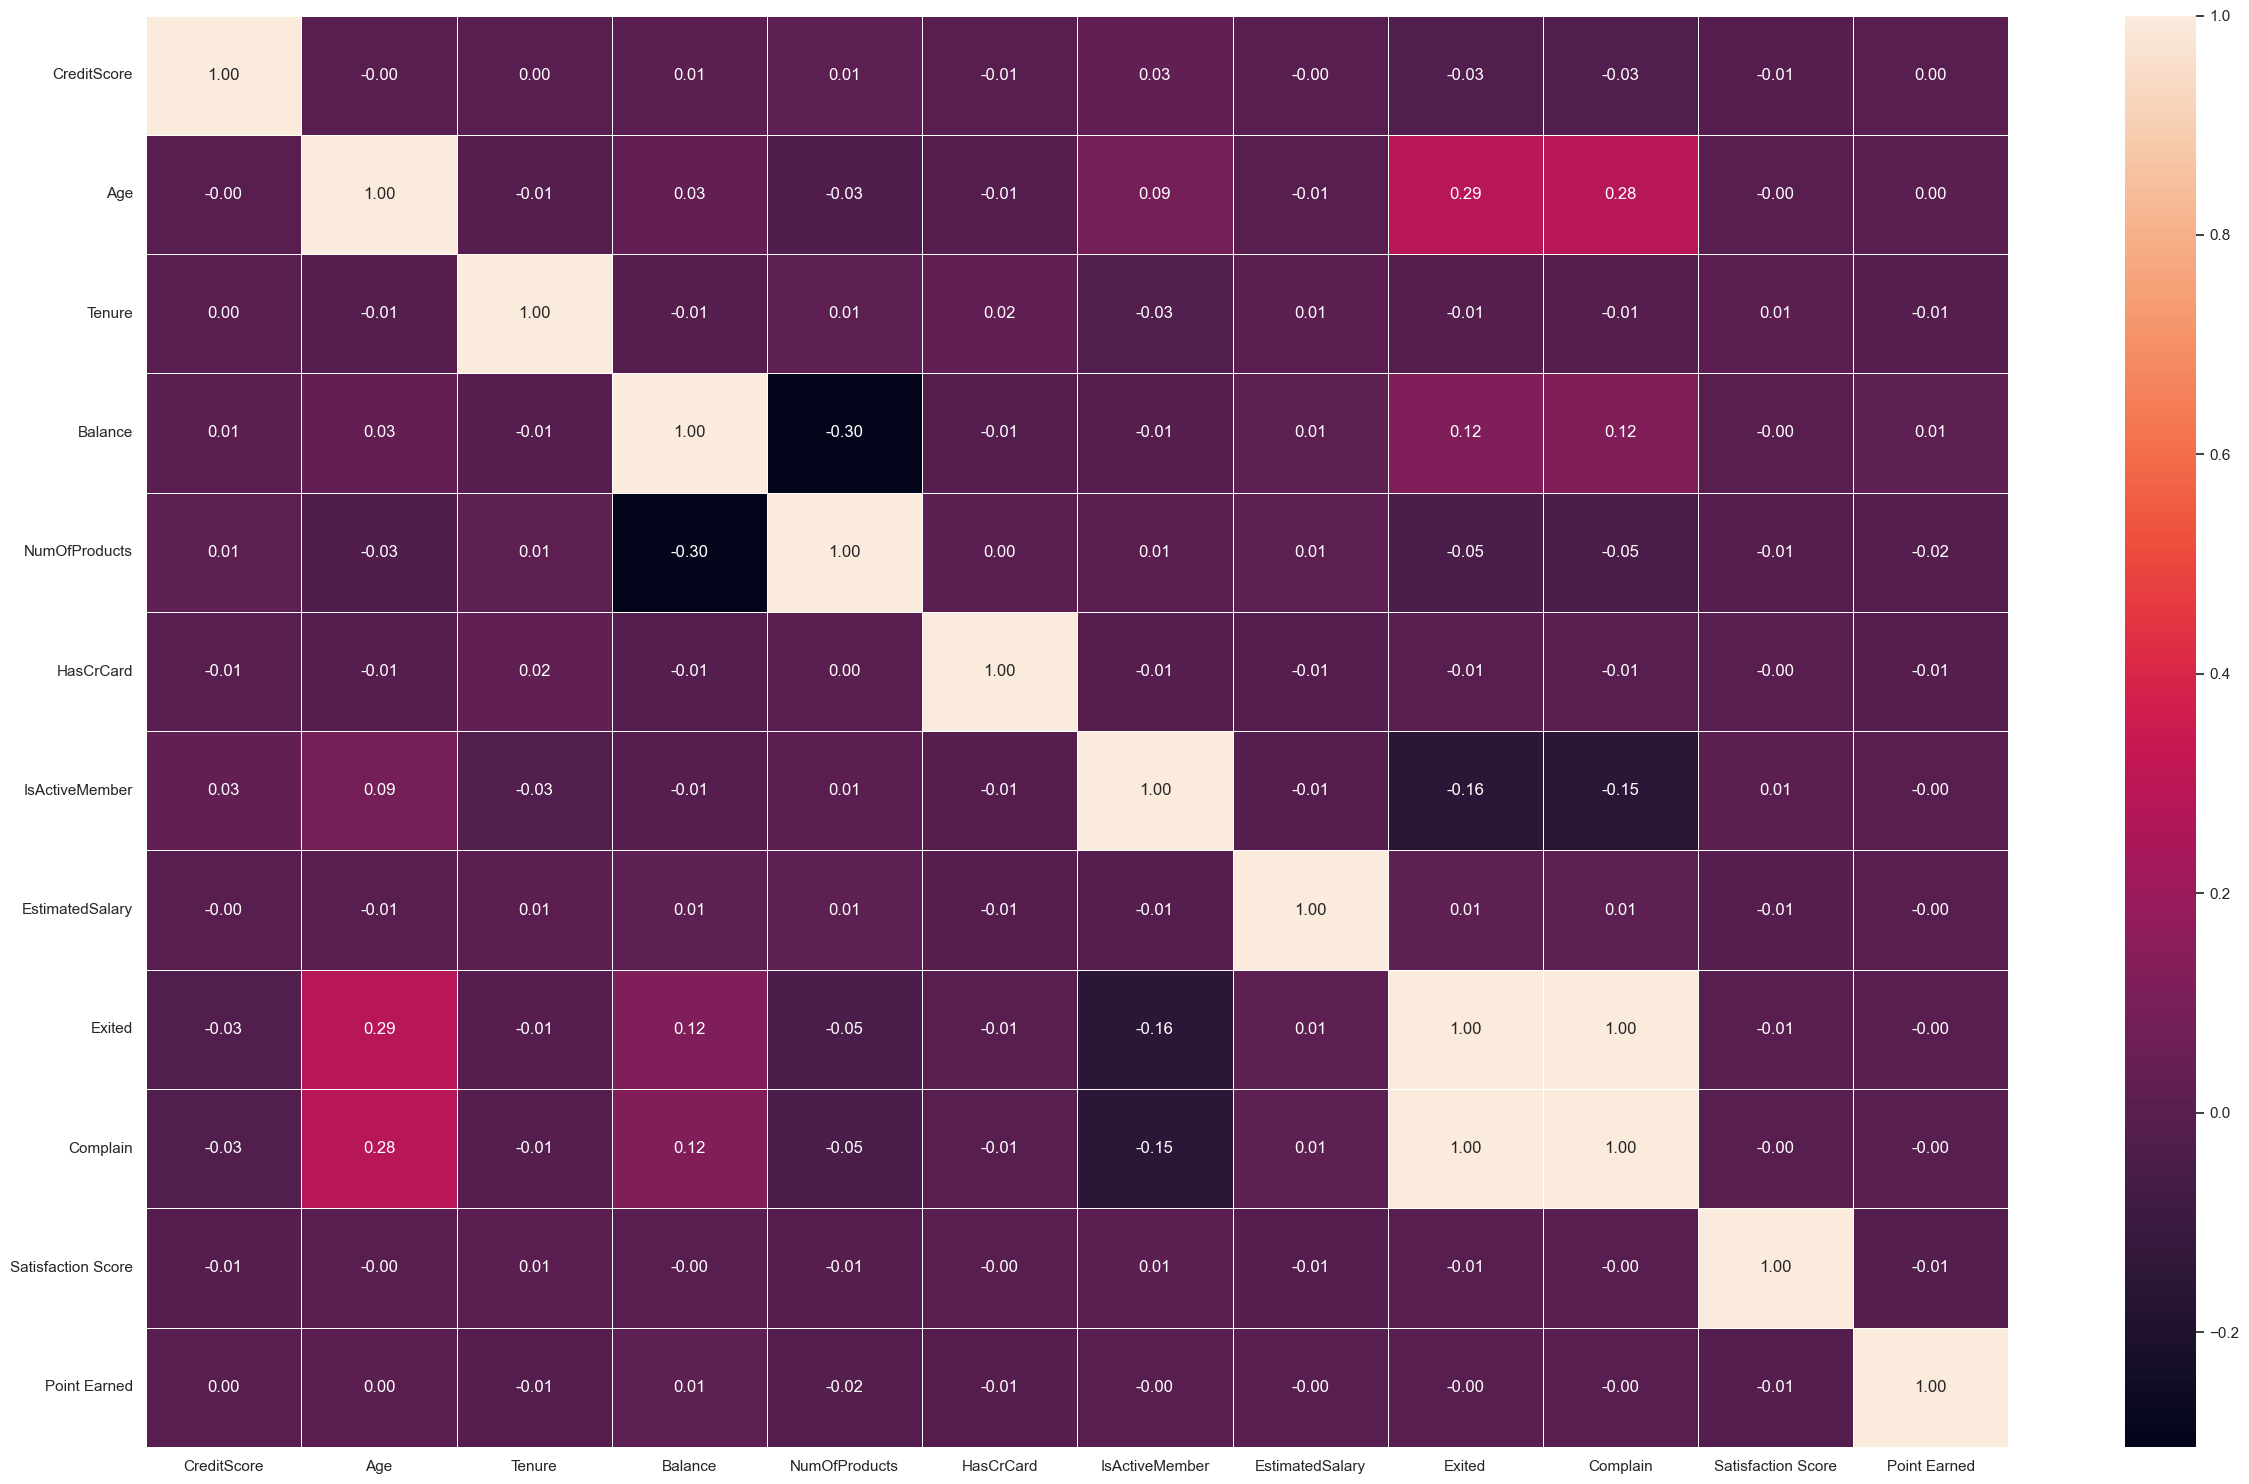

In [248]:
# visualization of correlation analysis
plt.figure(figsize=(25, 15))
sns.heatmap(df_corr, annot=True, fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()
# Let's check this correlation matrix for further development of predictive model

In [ ]:
'''Insight
Checking the row 'Exited', only 'Age', 'Balance' have positive and reasonable correlation with 'Exited'. 
Saying that older age and high balance may be correlate to high churn rate.
Other variables' correlation with 'Exited' are negative.

The 'Complain' have a extremely high value of correlation with 'Exited'.
However, this extremely large value of correlation by 'Complain' is not recommended as input of the machine learning model.
Collinearity may occur, which means 'Complain' varies a little bit can lead to large change in prediction of exiting or not.
'''

In [301]:
# Let's prepare to develop predictive model for customers to exit or not
# The model with high accuracy can help the decision makers to determine more confident and cost-effective plan for improvement of customer churn rate.

# Before model development, change the category into number by label encoder
df_category = ['Geography', 'Gender', 'Card Type']
df_irrel1 = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore_Class', 'age_group', 'Balance_Group', 'Salary_Group']
df_ml = df
for i in range(len(df_irrel1)):
    df_ml = df_ml.drop(df_irrel1[i], axis=1)
    
df_ml

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
1                      3   DIAMOND           456  
2                      3   DIAMOND           377  
3                      5      GOLD           350  
4                      5      GOLD           425  
...                  ...       ...           ...  
9995                   1   DIAMOND           300  
9996                   5  PLATINUM           771  
9997                   3    SILVER           564  
9998                   2      GOLD           339  
9999                   3   DIAMOND           911  

[10000 rows x 15 columns]

In [302]:
# define function for category by label encoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def encode_cat(dataset, columns):
    encoder = LabelEncoder()
    
    for col in columns:
        dataset[col] = encoder.fit_transform(dataset[col])
    return dataset
        
df_ml = encode_cat(df_ml, df_category)
df_ml

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score  Card Type  Point Earned  
0                      2          0           464  
1                      3          0           456  
2                      3          0           377  
3                      5          1           350  
4                      5          1           425  
...                  ...        ...           ...  
9995                   1          0           300  
9996                   5          2           771  
9997                   3          3           564  
9998                   2          1           339  
9999                   3          0           911  

[10000 rows x 15 columns]

In [303]:
# check gender
df_ml.groupby(['Gender']).size()
# 0 means for female, 1 means for males

Gender
0    4543
1    5457
dtype: int64

In [304]:
# check geography
df_ml.groupby(['Geography']).size()
# 0 means for France
# 1 means for Germany
# 2 means for Spain

Geography
0    5014
1    2509
2    2477
dtype: int64

In [305]:
# check card type
df_ml.groupby(['Card Type']).size()

Card Type
0    2507
1    2502
2    2495
3    2496
dtype: int64

In [306]:
df.groupby(['Card Type']).size()
# 0 means for Diamond card
# 1 means for Gold card
# 2 means for Platinum card
# 3 means for Silver card

Card Type
DIAMOND     2507
GOLD        2502
PLATINUM    2495
SILVER      2496
dtype: int64

In [307]:
# additionally, drop the column of 'Complain'
# prevent collinearity
df_ml.drop('Complain', axis=1, inplace=True)
df_ml

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  \
0             1               1        101348.88       1                   2   
1             0               1        112542.58       0                   3   
2             1               0        113931.57       1                   3   
3             0               0         93826.63       0                   5   
4             1               1         79084.10       0                   5   
...         ...             ...              ...     ...                 ...   
9995          1               0         96270.64       0                   1   
9996          1               1        101699.77       0                   5   
9997          0               1         42085.58       1                   3   
9998          1               0         92888.52       1                   2   
9999          1               0         38190.78       0                   3   

      Card Type  Point Earned  
0             0           464  
1             0           456  
2             0           377  
3             1           350  
4             1           425  
...         ...           ...  
9995          0           300  
9996          2           771  
9997          3           564  
9998          1           339  
9999          0           911  

[10000 rows x 14 columns]

In [310]:
# Add underscore for all variables' names
df_ml.columns = df_ml.columns.str.replace(' ', '_')
df_ml

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Satisfaction_Score  \
0             1               1        101348.88       1                   2   
1             0               1        112542.58       0                   3   
2             1               0        113931.57       1                   3   
3             0               0         93826.63       0                   5   
4             1               1         79084.10       0                   5   
...         ...             ...              ...     ...                 ...   
9995          1               0         96270.64       0                   1   
9996          1               1        101699.77       0                   5   
9997          0               1         42085.58       1                   3   
9998          1               0         92888.52       1                   2   
9999          1               0         38190.78       0                   3   

      Card_Type  Point_Earned  
0             0           464  
1             0           456  
2             0           377  
3             1           350  
4             1           425  
...         ...           ...  
9995          0           300  
9996          2           771  
9997          3           564  
9998          1           339  
9999          0           911  

[10000 rows x 14 columns]

In [312]:
# check with multi-collinearity diagnosis
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Exited ~ CreditScore+Geography+Gender+Age+Tenure+Balance+NumOfProducts+HasCrCard+IsActiveMember+EstimatedSalary+Satisfaction_Score+Card_Type+Point_Earned', data=df_ml, return_type='dataframe')
vid_df = pd.DataFrame()
vid_df['variables'] = X.columns
vid_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vid_df)

             variables        VIF
0            Intercept  97.022744
1          CreditScore   1.001260
2            Geography   1.006419
3               Gender   1.002581
4                  Age   1.010468
5               Tenure   1.002104
6              Balance   1.109987
7        NumOfProducts   1.105104
8            HasCrCard   1.001317
9       IsActiveMember   1.010427
10     EstimatedSalary   1.001318
11  Satisfaction_Score   1.000915
12           Card_Type   1.001721
13        Point_Earned   1.001059


In [ ]:
'''Checking
VIF = 1 means that all the variables don't have large effect of multi-collinearity.
Now move on for the model development
'''

In [316]:
# data standardlization for more accurate result
# Classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

# Set X and y
X = df_ml.drop('Exited', axis=1)
y = df_ml['Exited']

# split data into training set and testing set, ratio 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardlization
sc = MinMaxScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

array([[0.634, 1.   , 0.   , ..., 1.   , 0.   , 0.577],
       [0.154, 0.5  , 1.   , ..., 1.   , 1.   , 0.339],
       [0.37 , 0.   , 0.   , ..., 0.25 , 0.667, 0.988],
       ...,
       [0.776, 0.   , 1.   , ..., 1.   , 1.   , 0.507],
       [0.48 , 1.   , 0.   , ..., 0.5  , 1.   , 0.518],
       [0.546, 0.5  , 0.   , ..., 0.5  , 0.667, 0.118]])

In [318]:
# define model dictionary type for recording scores of each model
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=0, max_depth=5, criterion='entropy'),
    'KNegihborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0),
}

# train the model
model_scores = {}
for name, model in models.items():
    model.fit(X_train_std, y_train)
    model_scores[(name, 'train')] = model.score(X_train_std, y_train)
    model_scores[(name, 'test')] = model.score(X_test_std, y_test)

# for visualization of model accuracy
model_scores

{('LogisticRegression', 'train'): 0.808,
 ('LogisticRegression', 'test'): 0.808,
 ('DecisionTreeClassifier', 'train'): 0.857,
 ('DecisionTreeClassifier', 'test'): 0.858,
 ('KNegihborsClassifier', 'train'): 0.845,
 ('KNegihborsClassifier', 'test'): 0.799,
 ('SVC', 'train'): 0.849,
 ('SVC', 'test'): 0.848,
 ('RandomForestClassifier', 'train'): 1.000,
 ('RandomForestClassifier', 'test'): 0.867,
 ('GradientBoostingClassifier', 'train'): 0.873,
 ('GradientBoostingClassifier', 'test'): 0.866}

In [320]:
# visualization in table
Series(model_scores).unstack().sort_values(by='test', ascending=False)

test     train
RandomForestClassifier      0.8665  1.000000
GradientBoostingClassifier  0.8655  0.872875
DecisionTreeClassifier      0.8575  0.856875
SVC                         0.8475  0.849000
LogisticRegression          0.8080  0.807750
KNegihborsClassifier        0.7995  0.844500

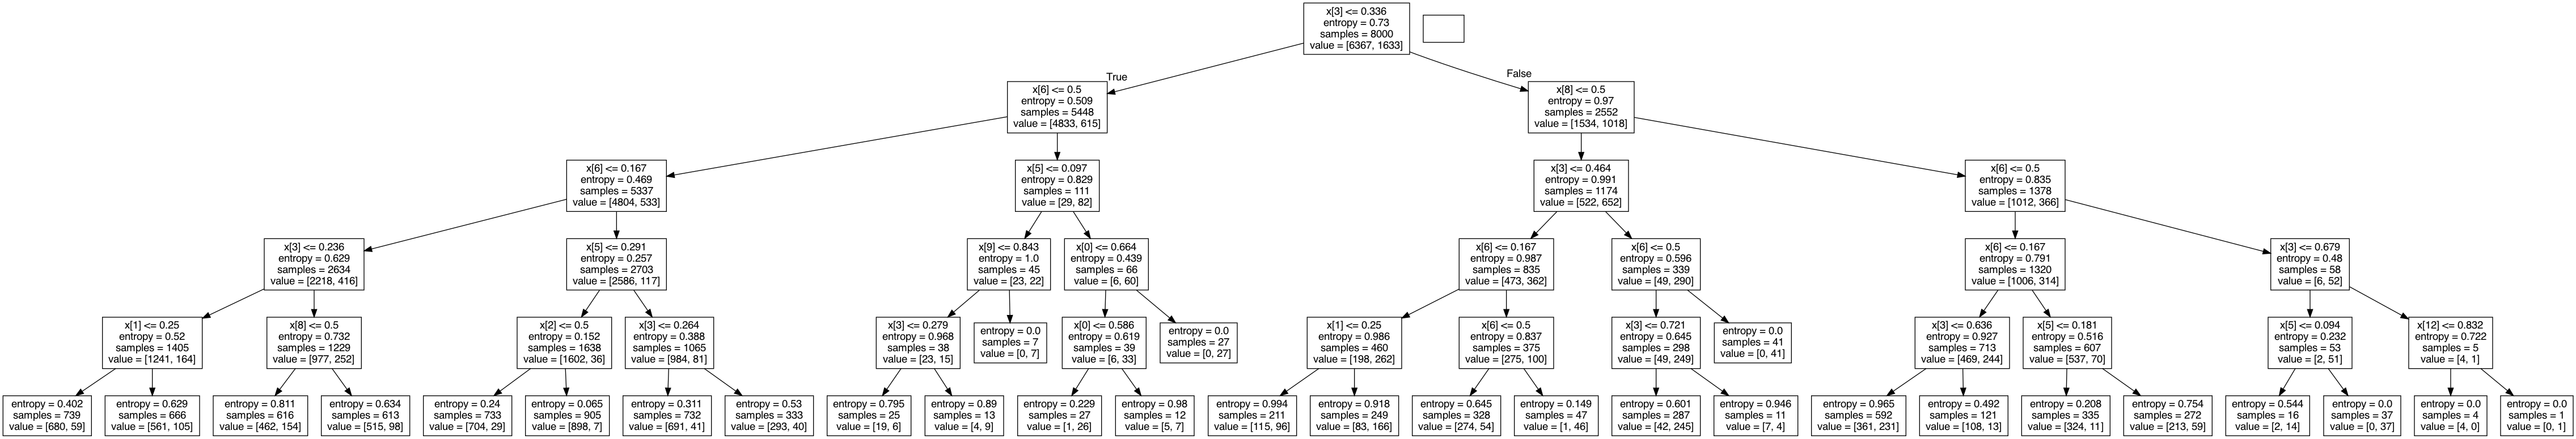

In [323]:
# As a result, the top three models can also achieve accuracy above 85%
# Let's choose the DecisionTreeClassifier for study and visualization
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(models['DecisionTreeClassifier'], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [327]:
# Using the predictive model for application 
# Taking one sample from the test dataset for demostration
sample = X_test.head(1)
sample

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9394          597          1       0   35       8  131101.04              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction_Score  \
9394          1               1        192852.67                   3   

      Card_Type  Point_Earned  
9394          3           758

In [343]:
# Let's perform 100 experiments for the 
y_pred = models['DecisionTreeClassifier'].predict(sample)
y_pred
# The model predict this customers will exit.

/Users/andychan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

In [ ]:
'''Evaluation
It is impressive to construct a model with accuracy above 85%, very close to 90%
'''

In [ ]:
'''Conclusion
Q1: Any insight discovered?
Before in-depth analysis, the dataset have been checked with preprocessing. 
All the columns-count charts have been investigated for fair analysis without large bias.

Some findings can also be useful and meaningful for selecting the target customer group.

Finding 1: 
Majority of the customers is Adult group (77.7%) (7768 out of 10000).
Adult group is the largest group in a city/country and more probably to generate high work productivity in society.
The second top customers are belong to young_adult. 
Therefore, it is suggested that the bank can set up more strategic plan for these two target customer groups.

Finding 2: 
After comparing the balance and salary chart, 
there are around 9.5% of customers' balance with 150,000 or above.
At the same time, there are approximately %19.9 of customers' estimated salary with $160,000.

It may imply that although the customer have abiliy of gaining high salary, the balance may not be necessarily high.
Reason behind may be due to the extreme large expenditure in daily life (depend on individual's consumer behaviour).
Other important reason may be that the customers have high probability to have multiple bank accounts (depend on competition between other bank services, 
can also study why customers may high larger balance in bank A account but less balance in Bank B). 

Finding 3:
It can be clearly observed that around 96.7% majority of customers have purchased 1 to 2 products of the bank.
The high number of product purchased is not common as shown in the sample distribution.

Finding 4:
Most of the customers (70.6%) in the sample are having credit card in the bank.

Finding 5: 
The majority (79.6%) of customer have not exited.

Finding 6:
The majority (79.6%) of customers have no complaint on the bank services.
It is an inspiring result for the bankers. 

Q2: What suggestion can be made to prevent from customer churn?
Combining the above findings, specific insights can be concluded:

Insight 1: Insight for Relationship between Gender and Exited
For those who was not exited, the quantity of male customers is larger than that of female customers.
However, the quantity of female exited customers is larger than that of males customers.

From the corresponding pivot table, there are around one-fourth of female customers have exited.
We can say that the female customers may have higher probability than male customers to exit in the sample case.

Therefore, it is interesting to think why female customers have higher customer churn rate.
For example, related to salary? Maybe local culture have gender stereotypes to recruit more male employee for higher salary, leading to stability in the bank services?
Or maybe the different consumer behaviour of female and male have influence of the result? 

To apply with the insight, it is suggested to provide credit card specific offers for female customers spending on accessories and clothing.
One reason is that buying accessories is more prevalent in female customer group than male customer group.
Credit card offers for buying accessories or facial treatment can not only retain the female customers as long as possible but also increase the transaction in accessories industry.
A win-win situation can be provided for the bank and other industry.

Insight 2: Insight for Relationship between CreditScore_Class and Exited
It is obvious to see the left-skewed bar chart for both exited and not exited trend.
Furthermore, the probability of each CreditScore_Class is around 20% in the corresponding class, 
very close to the total probability of the 10,000 samples, 20.38%.

It reflects that no matter which credit score the customers are having, 
there is still around one-fifth chance for the customers to exit.

As compared to gender-exited circumstance, it seems that gender have temporarily higher effect on churn rate.

Therefore, it is suggested to reduce the resources on how credit score impact on circumstance of exiting.

Insight 3: Insight on Relationship between age_group and exited
It is clear to find that the largest age_group for exited and not exited customers is the Adult group.
The reason is that the samples take large number of adult data (highest productivity group), and it actually match with the realistic situation as mentioned.

As shown in the pivot table, the probability for child, young_adult, elderly to exit is extremely low as compared to that of adult.
More interestingly, the probability of adult (23.88%) to exit is higher than the total probability of customer churn (20.38%).

It highlights the importance for a bank to focus on the adult group with more support or strategies. 
Retaining more adult customers can considerably reduce the customer churn rate.

Insight 4: Insight on Relationship between tenure and exited
The exit and non-exit bar charts are similar in distribution.
No matter how long the tenure is, the percentage of exiting is still around 20%.

Originally, I was thinking the customers with longer tenure may have lower churn rate, 
because I assume that older customers should be more loyal and stable in the bank.

As proved by the bar charts and pivot, the original hypothesis statement is not a must.
It is common that advanced bank services provided for the longer tenure customers is more attracting,

It helps us to understand that the current bank services may be old and insuitable to retain longer tenure.
The bank need to investigate the weakness of strategy and develop more attractive incentive for retaining adult customers. 

Insight 5: Insight on Relationship of Balance, Salary and Exited
The customers, who having balance under $50,000 and salary under $40,000, acoount for the lowest probability customers group to exit (13.48%).
The highest probability belong to those who have balance above $200,000.
However, it is non-sense to make conclusion with the highest probability due to the extremely low quantity of data with balance above 200,000.

In this analysis case, I would like to recognize the data with balance above $200,000 as outlier and ignore them for higher accuracy of analysis.

Interestingly, the probability of exited customers with balance of $100,000 to $150,000 is quite high (25.78%, higher than total churn probability of customers).
As we know, the customers with higher balance should be loyal to stay in the bank.

Combining this findings with metnioned tenure circumstance, 
there is several interesting insights.

Customer balance may be one of the important parameter influencing the customer churn rate as compared to tenure. 
Long tenure may not be the main reason for staying and cannot guarantee low customer churn rate.
These findings may suggest that customers in recent ceuntry may tend to be attracted by welcome gift offer to save little balance in their bank account,
but may not consider loyality as important factors to stay in the bank.
Once they have saved certain level of balance like above $100,000, customers may also have higher probability to consider exiting.
The potential reason may be other attraction from other bank with new welcome gift offer or alternative incentives.

Therefore, the data highlights the importance of keeping high tenure customers with middle level of balance. 
Retaining this target group customers can be one of the strengthness in SWOT analysis of a bank among market cmpetition.
Higher discount offer for financial products may be suggested for those customers with high tenure and high balance to prevent high churn rate.

Insight 6: Insight on relationship of number of products, credit card and exited
Although the customer data above 4 number of products may be a outlier,
the trend of number of products data can also reflect that
the more the number of products owned, the lower churn rate will be.

Having a credit card or not is not the major factor on customer churn 
because the corresponding probability is similar to the overall customer churn probability does.

Any suggestion:
One of the recommeded banking strategy is to strengthen the purchasing rate of products in order to retain customers with high balance and tenure.
For example, higher discounts of products
Set priority rule for those target customers with five tenure to purchase products
After having $100,000 balance or above, provide extra earn points or cashback for credit card.
Higher saving interest for those who having $150,000 or above.

Insight 7: Insight on relationship of complain, satisfaction score and exited
It is very obvious to see that extremely high probability of customers (99.5%) with complaint experience to exit the bank.

Comparing to the variable of complain, satisfaction score may not have high impact on exiting or not.

This findings suggest the insight that effort for complaint prevention is the key to retain customers, no matter how high the satisfaction score is.
Certain key performance index may be constructed with complaint number.
For example, keeping complaint number to be less than 20% of total customers in each month.
The reason of setting < 20% complaint cases is that the complaint probability in overall customers is around 20%.
In short term, the bank can set KPI with less than 20% complaint first.
In long term, the bank can also set KPI with lower number of complaint and the average satisfaction score to be above 4.

Insight 8:
Checking the row 'Exited', only 'Age', 'Balance' have positive and reasonable correlation with 'Exited'. 
Saying that older age and high balance may be correlate to high churn rate.
Other variables' correlation with 'Exited' are negative.

The 'Complain' have a extremely high value of correlation with 'Exited'.
However, this extremely large value of correlation by 'Complain' is not recommended as input of the machine learning model.
Collinearity may occur, which means 'Complain' varies a little bit can lead to large change in prediction of exiting or not.

Overall suggestion in bank strategy to prevent high customer churn rate:
1. Focus target customer group: Young_adult and adult, more offers for female customers
2. No need to dedicate much resources in term of CreditScore for retaining customers.
3. The existing strategy cannot be significantly powerful to retain customers with long tenure and high balance.
4. The customer churn rate is lower for those customers with higher number of bank products
5. Potential strategies (details shall be discussed with business team and customner relationship team)
    5.1. Set priority rule for those target customers with five tenure to purchase bank products
    5.2. After having $100,000 balance or above, provide extra earn points or cashback for credit card.
    5.3. Higher saving interest for those who having $150,000 or above.
    5.4. Higher discounts of bank products for customers who having $150,000 balance and five tenure.
    5.5. Special shopping credit card offers for female customers to consume in the specific accessories, clothing and facial shops.
    5.6. Provide more advanced training for employees to increase service quality in order to reduce the frequency of complaints.
    5.7. If trainers is not professional to teach, better to invite famous trainers from oversea. Maybe interesting and innovative culture can be applicable in local city/country.
    5.8. Improve the digital bank mobile app with up-to-dated user-interface to increase the efficiency of bank services, avoiding frequent manual mistake to minimize complaints.
    
Q3: Model development to predict the customer exit or not
Decision tree classifier model have been used and suitable for prediction with high accuracy (85%).
In real application, the model shall be discussed with the data scientist team for advanced suggestion.
For example, data scientist team may suggest apply other non-supervisory model, deep learning model like MLP, NLP for further analysis.

After that, the model can be suggested for decision-making team to develop suitable strategies for reduce customer churn rate.
'''